In [1]:
###################################################################################
#
# WHEN : APRIL 15,2020
#
# WHAT : C)Radial_Fit.ipynb
#
# HOW  : This runs the radial profiles for you . 
#
# INPUT : You give it *image.fits files
#            This is the files that has been simulated by Marx
#            You must have blocked out any contamination in the files
#            Here, you can dmcopy with the region you want to look at. 
#
#         You could also give it event files
#             With these, since it's a control, u don't need to remove contamination
#            Here, you can dmcopy with the region you want to look at.
#
#         You must give LIST
#             This is the LIST of Obsid to look at
#
#         You must give RLIST
#             This is the Radius of the region that you want to look at
#
###################################################################################

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import Angle
from astropy.io import fits
import math
#from Library import *
import os
import sys
import re
plt.rcParams['figure.figsize']=(18,18)
%matplotlib inline
print(os.getcwd())

/Users/tzegoh/Desktop/ciao


In [3]:
# Sherpa specific 
from sherpa_contrib.all import *
from sherpa import *
from ciao_contrib.runtool import *

from ciao_contrib.runtool import acis_process_events, dmstat, dmmerge
import ciao_contrib.runtool
import ciao_contrib.runtool as rt
import sherpa.astro.ui as ui
from sherpa_contrib.profiles import *
from six.moves.configparser import *
from sherpa.astro.ui import *

# Chips # NO MORE CHIPS FROM CIAO 4.12 ONWARDS !
#import chips_contrib.utils
#from chips_contrib.utils import *
#from chips_contrib import *
#from pychips import *
#from pychips.hlui import *
#from pycrates import *

# We have to use matplotlib instead then
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline


# Marx
from sherpa_contrib.marx import *
# ChaRT
from sherpa_contrib.chart import *

# DS9
import subprocess
import glob
from glob import glob

from paramio import *
import paramio

In [4]:
'''HERE WE GO !!!!'''

'HERE WE GO !!!!'

In [5]:
'''COLORING
https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html'''
# COLORS
# Let's get the pretty colors

''' The following are for soft '''
cmap = plt.get_cmap('winter')
# Let's break the pretty colors down into individual componenets
colorWinterSoft = cmap(np.linspace(0, 1.0, 20))

# Let's get the pretty colors
cmap = plt.get_cmap('autumn')
# Let's break the pretty colors down into individual componenets
colorAutumnSoft = cmap(np.linspace(0, 1.0, 20))


''' The following are for hard '''
cmap = plt.get_cmap('spring')
# Let's break the pretty colors down into individual componenets
colorSpringHard = cmap(np.linspace(0, 1.0, 20))

# Let's get the pretty colors
cmap = plt.get_cmap('cool')
# Let's break the pretty colors down into individual componenets
colorCoolHard = cmap(np.linspace(0, 1.0, 20))



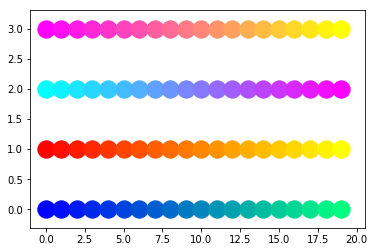

In [6]:
'''MY CRAYONS'''
for i in range(0,20):
    plt.scatter(i,0,s=300,color=colorWinterSoft[i])
    plt.scatter(i,1,s=300,color=colorAutumnSoft[i])
    plt.scatter(i,2,s=300,color=colorCoolHard[i])
    plt.scatter(i,3,s=300,color=colorSpringHard[i])
    



In [7]:
things = str('someinroewnr_aojsnd')
if "marx" in things :
    print('it is here')
else:
    print('nonono')

nonono


In [260]:
def tellMeTheColors(IsItSoft):
    '''This one just tells you what colors to use to plot the radial profiles.
    It is really, really cute.
    Lensed : L or V, where L means lensed
    IsItSoft : yes or no '''
    
    if IsItSoft == str('yes'): # It is soft photons 
        colorS = colorAutumnSoft
        colorW = colorWinterSoft
    else: # It is hard photons 
        colorS = colorSpringHard
        colorW = colorCoolHard          
        
    return colorS,colorW
    

def fitMe2GaussianORIGINAL(N,C1,C2,R,Lensed,IsItSoft,B):
    ''' This is the correct one. USE THIS ONE FOR RADIAL PROFILE FITTING !!!'''
    '''https://cxc.harvard.edu/sherpa4.4/threads/spatial-profile/'''
    '''https://cxc.harvard.edu/sherpa/threads/spatial-profile/''' # use this 
    '''https://cxc.harvard.edu/sherpa/threads/spatial/index.html#estab''' # original
    N = str(N)     # Name
    C1 = str(C1)   # RA
    C2 = str(C2)   # Dec
    R = str(R)     # Radius
    
    fontsize = 16 
    colorS,colorW = tellMeTheColors(IsItSoft)
    logLimHi = 1e6 # choose an even number for exponent for easier graph
    logLimLo = 1e-6
    
    print('\n')
    if Lensed == str('L'):
        print('LENSED')
    print('The 1st plot starts here:')
    print('\n')
    
    # SET AND THE SOURCE MODEL TO BE USED 
    set_source(gauss2d.src)
    # most of the position of the brightest pixel is around ~4000
    src.xpos.min=3000
    src.xpos.max=6000
    src.xpos = C1
    src.ypos = C2
    freeze(src.xpos)
    freeze(src.ypos)    
    #src.theta.min = 0 
    #src.theta.max = 1*np.pi
    guess(src)
    print(src)
    set_par(src.fwhm, min=0.1, max=300, val=20)
    set_par(src.ampl, min=0.1, max=1000, val=20)
    show_model()

    
    # Get the background first 
    if "marx" in str(N):
        print(N,'N : we are running marx')
    else:
        print(N,'N : we are running the actual observed quantity')
        #bkg = str(B +'.fits')
        #load_image(bkg)
        #radialB = get_data_prof() # This one gets you the data itself 
        #print(radialB,'radialB')
        #print(type(radialB))
        #xloB = radialB.xlo
        #xhiB = radialB.xhi
        #yB = radialB.y
        #yerrB= radialB.yerr
        #'''xlo and xhi is good for making histograms; if a single point, just use xmid.'''
        #xdiffB = xhiB - xloB
        #increasingNumbers = np.linspace(0,xhiB.shape[0],xhiB.shape[0])
        #xmidB = increasingNumbers + xdiffB
        #print(xloB.shape,'xlo.shape')
        #print(xmidB,'xmidB')
        #print(yB,'yB')
    
    
    #Load that image
    name = str(N+'.fits')
    load_image(name)
    set_coord("physical")
    set_stat("cash")
    set_method("simplex")
    get_coord()
    get_stat_name()
    get_method_name()
    
    
    # REF : You are just limiting the region -- extraneous, but lets just do it 
    ###region = str("circle(" + C1 + "," + C2 + "," + R + ")")
    ###notice2d(region)
    
    # REF : Use the following to block out a region for noJet: do this is ds9
    #This is only for the real obbservation, not for marx 
    #filtering = str('box(4109,4121,8,15,320)')
    #filtering2 = str('box(4120,4135,7,8,320)')
    #ignore2d(filtering  + filtering2)

    # Gets the 1st radial profile of the Observation without any modification 
    %matplotlib inline
    #plt.figure(figsize=(16,12))
    fig, ax = plt.subplots(figsize=(16, 12))
    #prof_data() # < --- This is the command that gets you radial profile automatically
    # TURN ON THE ABOVE IF YOU'RE NOT SURE THAT YOU ARE PLOTTING CORRECTLY 
    radial = get_data_prof() # This one gets you the data itself 
    print(radial,'radial')
    print(type(radial))
    xlo = radial.xlo
    xhi = radial.xhi
    y = radial.y
    yerr= radial.yerr
    '''xlo and xhi is good for making histograms; if a single point, just use xmid.'''
    xdiff = xhi - xlo
    xmid = xlo + xdiff/2
    print(xlo.shape,'xlo.shape')
    
    
    ''' LET US MAKE THAT FIRST PLOT OF RADIAL PROFILE OF THE OBSERVATION
    -- no fitting at the moment''' 
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(left=0.3,right=800)
    plt.ylim(bottom = logLimLo,top=logLimHi)
    #Main Plot
    plt.errorbar(xmid,y,yerr=yerr,ecolor=colorW[14],c=colorW[8], zorder=1,
                 lw=1,alpha=0.75,label='Plot with errorbars')
    plt.scatter(xmid,y,marker='o',c=colorS[19],edgecolors=colorS[14],#zorder=2,
                s=200,alpha = 0.5,label='Scatter plot')
    #The background 
    if "marx" in str(N):
        print(N,'N : we are running marx')
    else:
        print(N,'N : we are running running the actual observed quantity')
        #plt.scatter(xmidB,yB,marker='o',c=colorW[19],edgecolors=colorW[14],zorder=2,
        #            s=200,alpha = 0.25,label='Background Scatter plot')
        #plt.errorbar(xmidB,yB,yerr=yerrB,ecolor=colorS[14],c=colorS[8],zorder=1,
        #             lw=2,alpha=0.5,label='Background with errorbars')
    title = str(N+": 1st plot of Rad Profile -- Observation ")
    plt.title(title,fontsize=fontsize)
    plt.ylabel('log_Counts per physical pixel ',fontsize=fontsize)
    plt.xlabel('log_Radies Physics Pixels',fontsize=fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.legend(loc='upper right',fontsize=fontsize)
    name = str(N+'_plot1.pdf')
    plt.savefig(name)
    plt.rc('grid', linestyle="--", color='gray',alpha=0.5)
    plt.grid(True)
    #The textbox
    srcFHWM= src.fwhm.val
    srcAMPL= src.ampl.val
    textstr = '\n'.join((
    r'$srcFHWM=%.2f$' % (srcFHWM, ),
    r'$srcAMPL=%.2f$' % (srcAMPL, ),
    ))
    # place a text box in lower right in axes coords
    ax.text(0.05, 0.25, textstr, fontsize=fontsize,
            horizontalalignment='left',transform=ax.transAxes,
        verticalalignment='center'
            )
    
    plt.show()
    
    # Save the damn data 
    saveDataName = str(N+'_plot1.npy')
    dataLIST = [xlo,xhi,y,yerr,xdiff,xmid]
    DATA = np.asarray(dataLIST)
    np.save(saveDataName,DATA)

    #limits(X_AXIS, 0.5, AUTO)
    #limits(Y_AXIS, AUTO, 1000) # This refers to the main radial profile
    ##########################FIRST FIGURE###############################

    
    
    ''' LET US MAKE THAT 2ND PLOT OF THE RADIAL PROFILE OF THE OBSERVATION
    -- and the modelling of the data, but without fitting yet '''     
    print('\n')
    print('The second plot starts here:')
    print('\n')

    
    # Modelling w/o fitting yet 
    sky_data = get_data().sky
    print('This is your sky data : ',sky_data)
    print(type(sky_data),'type(sky_data)')
    print(sky_data.cdelt[0],'sky_data.cdelt[0]')
    print(sky_data.cdelt[1],'sky_data.cdelt[1]')
    
    # What is the source of your fit 
    set_source(src + const2d.bgnd) #<- source + background 
    bgnd.c0.min = None
    bgnd.c0.max = 100 # reasonable number 
    sourceBkg = input('What is the min background (look at 1st figure for min y values)'
                     +'and use exponetials eg 5e-3 ')
    bgnd.c0 = float(sourceBkg) * float(sky_data.cdelt[0]) * float(sky_data.cdelt[1])
    print(bgnd.c0,'bgnd.c0')
    
    
    #bgnd.c0 = backgound
    bgnd.c0.max = 100 # reasonable number 
    prof_fit(label=False) # <-- this command fits the plot for you 
    # This is it : Let us get ready to plot 
    
    %matplotlib inline
    #plt.figure(figsize=(16,12))
    fig, ax = plt.subplots(figsize=(16, 12))
    #get_data_prof_prefs()["xlog"] = True
    #get_data_prof_prefs()["ylog"] = True
    radial2 = get_fit_prof(label=False)
    # The following are plot points from the model
    xlo2 = radial2.modelplot.xlo
    xhi2 = radial2.modelplot.xhi
    y2 = radial2.modelplot.y
    xdiff2 = xhi2 - xlo2
    xmid2 = xlo2 + xdiff2/2
    
    # The following are plot points from the data ; the T stands for daTa point
    xlo2T= radial2.dataplot.xlo
    xhi2T= radial2.dataplot.xhi
    y2T= radial2.dataplot.y
    yerr2T= radial2.dataplot.yerr
    xdiff2T = xhi2T - xlo2T
    xmid2T = xlo2T + xdiff2T/2    
    #xlo and xhi is good for making histograms; if a single point, just use xmid

    # Get ready to plot 
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(left=0.3,right=800)
    plt.ylim(bottom = logLimLo,top=logLimHi)
    #limits(X_AXIS, 0.5, AUTO)
    #limits(Y_AXIS, AUTO, 10000) # This refers to the main radial profile
    #BASICALLY THE FOLLOWING IS A RECREATION OF PLOT 1 !!!!
    plt.errorbar(xmid2T,y2T,yerr=yerr2T,ecolor=colorW[14],c=colorW[8],zorder=1,
                 lw=1,alpha=0.75,label='Plot with errorbars : observed data')
    plt.scatter(xmid2T,y2T,marker='o',c=colorS[19],edgecolors=colorS[14],zorder=2,
                s=200,alpha = 0.5,label='Scatter plot : observed data')
    
    # FINALLY, here is the first model WITHOUT FITTING 
    plt.step (xlo2,y2,c=colorS[15],alpha = 0.85,where='post',zorder=3,
              lw=3,label = 'Unfitted model')
    
    title = str(N+": 2nd plot of Rad Profile -- Observe + unfitted model ")
    plt.title(title,fontsize=fontsize)
    plt.xlabel('log_Counts per physical pixel ',fontsize=fontsize)
    plt.ylabel('log_Radies Physics Pixels',fontsize=fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.legend(loc='upper right',fontsize=fontsize)
    name = str(N+'_plot2.pdf')
    plt.savefig(name)
    plt.rc('grid', linestyle="--", color='gray',alpha=0.5)
    plt.grid(True)
    #The textbox
    srcFHWM= src.fwhm.val
    srcAMPL= src.ampl.val
    Background= bgnd.c0.val 
    textstr = '\n'.join((
    r'$srcFHWM=%.2f$' % (srcFHWM, ),
    r'$srcAMPL=%.2f$' % (srcAMPL, ),
    r'$Background=%.10f$' % (Background, ) 
    ))
    # place a text box in lower right in axes coords
    ax.text(0.05, 0.25, textstr, fontsize=fontsize,
            horizontalalignment='left',transform=ax.transAxes,
        verticalalignment='center'
            )
    plt.show()
    
    # Save the damn data 
    saveDataName = str(N+'_plot2.npy')
    dataLIST = [xlo2T,xhi2T,y2T,yerr2T,xdiff2T,xmid2T,
               xlo2,xhi2,y2,xdiff2,xmid2]
    DATA = np.asarray(dataLIST)
    np.save(saveDataName,DATA)
    
    ##########################SECOND FIGURE###############################
    
    '''Ok, let us start on the 3rd model -- this one is fitted with the model'''

    # Modelling w/ fitting
    print('\n')
    print('The third plot starts here:')
    print('\n')

    guess(src)
    print(src.fwhm.val,'src.fwhm.val guess from the src ')
    print(src.ampl.val,'src.ampl.val guess from the src ')
    
    thaw(src.ampl,src.fwhm)
    
    IdealModelWidth = input('What should the FWHM of model be ?')
    
    src.fwhm = float(IdealModelWidth) 
        
    IdealModelHeight = input('What should the amplitude be ?')
    
    src.ampl = float(IdealModelHeight) #float(src.ampl.val) * float(IdealModelWidth) 	# You would have to see by eye how far away the model 
                                    # is from the data ; default is 0.5
        
        
    # Let us get ready to plot -- WE HAVE TO USE AX NOW TO GET 2 PLOTS 
    fit() # actual fitting 
    prof_fit_resid() # <-- This command gets the residual of the fit for you
    
    %matplotlib inline
    #SPLIT IT INTO 2 ROWS !!!
    fig, (ax1, ax2) = plt.subplots(2,figsize=(16, 16))
    gs = gridspec.GridSpec(ncols=1, nrows=2,
                             height_ratios=[2, 1],wspace=0.0,hspace=0.0)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    radial3F = get_fit_prof() # This gets you the data 
    #print(radial3F,'radial3F')
    #image_fit() # To display image in ds9 
    
    # The following is the fitted model plot
    xlo3F= radial3F.modelplot.xlo
    xhi3F= radial3F.modelplot.xhi
    y3F= radial3F.modelplot.y
    xdiff3F = xhi3F - xlo3F
    xmid3F = xlo3F + xdiff3F/2  
    #print(xlo3F.shape,'xlo3F.shape')
    #print(xhi3F.shape,'xhi3F.shape')
    #print(y3F.shape,'y3F.shape')
    
    # The following is the data point plot
    xlo3= radial3F.dataplot.xlo
    xhi3= radial3F.dataplot.xhi
    y3= radial3F.dataplot.y
    yerr3= radial3F.dataplot.yerr
    xdiff3 = xhi3 - xlo3
    xmid3 = xlo3 + xdiff3/2 
    
    # RESIDUAL = FITTED PLOT - DATA POINT
    radial3R=get_resid_prof() # This gets you the residual of the data 
    #print(radial3,'radial3')
    radial3S=get_delchi_prof() # This gets the residual of the data in sigma for you 
    #print(radial3D,'radial3D')   
    
    #print_window("16051_radial_1")	# Saves the file for you 

    # Changing x-axis
    get_resid_prof_prefs()["xlog"] = True
    get_delchi_prof_prefs()["xlog"] = True
    
    # The following is the residual in physical counts :R 
    xlo3R= radial3R.xlo
    xhi3R= radial3R.xhi
    y3R= radial3R.y
    yerr3R= radial3R.yerr
    xdiff3R = xhi3R - xlo3R
    xmid3R = xlo3R + xdiff3R/2  
    
    # The following is the residual in sigma   : S 
    xlo3S= radial3S.xlo
    xhi3S= radial3S.xhi
    y3S= radial3S.y
    yerr3S= radial3S.yerr
    xdiff3S = xhi3S - xlo3S
    xmid3S = xlo3S + xdiff3S/2  

    # PLOT IT 
    ax1.errorbar(xmid3,y3,yerr=yerr3,ecolor=colorW[14],c=colorW[8],zorder=1,
                 lw=1,alpha=0.75,label='Data plot with error bar')
    ax1.scatter(xmid3,y3,c=colorS[19],marker='o', edgecolors=colorS[14],zorder=2,
                s=200,alpha = 0.7,label='Data scatter plot')
    ax1.step(xlo3F,y3F,c=colorS[15],alpha = 0.8, zorder=3,
             lw=3,where='post',label='Fitted Plot')

    # THE RESIDUAL
    ax2.errorbar(xmid3R,y3R,yerr = yerr3R,c=colorS[5],fmt='o',alpha=0.5,
                label='Plot of the residual')
    ax2.axhline(0)

    #TITLE
    title = str(N+": 3RD plot of Rad Profile -- Observe + FITTED model ")
    fig.suptitle(title,fontsize=fontsize)
    #LABELLING
    ax1.set_ylabel('log_Counts per physical pixel ',fontsize=fontsize)
    ax2.set_ylabel('Counts(Residual) ',fontsize=fontsize)
    ax2.set_xlabel('log_Radius Physics Pixels',fontsize=fontsize)
    #LOG
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.set_yscale('log')
    #LIMITS
    ax1.set_ylim(bottom = logLimLo,top=logLimHi)
    ax2.set_xlim(left=0.3,right=800)
    ax1.set_xlim(left=0.3,right=800)
    ax2.set_ylim(bottom=-100,top=100)
    #TICK PARAMETERS
    ax1.tick_params(axis='both',labelsize = fontsize)
    ax2.tick_params(axis='both',labelsize = fontsize)
    #LEGEND
    ax1.legend(loc='upper right',fontsize=fontsize)
    ax2.legend(loc='upper right',fontsize=fontsize)
    ax1.grid(True,ls=":",alpha=0.5)
    ax2.grid(True,ls=":",alpha=0.5)
    #The textbox
    srcFHWM= src.fwhm.val
    srcAMPL= src.ampl.val
    Background= bgnd.c0.val 
    textstr = '\n'.join((
    r'$srcFHWM=%.2f$' % (srcFHWM, ),
    r'$srcAMPL=%.2f$' % (srcAMPL, ),
    r'$Background=%.10f$' % (Background, ) 
    ))
    # place a text box in lower right in axes coords
    ax1.text(0.05, 0.55, textstr, fontsize=fontsize,
            horizontalalignment='left',transform=ax.transAxes,
        verticalalignment='center'
            )    
    #SAVE IT 
    name = str(N+'_plot3.pdf')
    plt.savefig(name)
    plt.show()

    # Save the damn data 
    saveDataName = str(N+'_plot3.npy')
    dataLIST = [xlo3,xhi3,y3,yerr3,xdiff3,xmid3, # The data itself
               xlo3F,xhi3F,y3F,xdiff3F,xmid3F, # The fit 
               xlo3R,xhi3R,y3R,yerr3R,xdiff3R,xmid3R, # The residual
               xlo3S,xhi3S,y3S,yerr3S,xdiff3S,xmid3S] # The residual in sigma
    DATA = np.asarray(dataLIST)
    np.save(saveDataName,DATA)
    
    ##########################THIRD FIGURE###############################
    
    '''The Forth Figure starts below: Now we emplement the 2nd gaussian '''
    
    print('\n')
    print('The 4th plot starts here:')
    print('\n')
    
    # The second gaussian 
    
    # Do not use guess ! It forces a min and max value that you may not want 
    #set_source(bgnd + src + gauss2d.core) # <- source + background + 2nd gaussian
    #guess(core, limits=False)
    #print('This is show_source() with the guess of the CORE :')
    #show_source()
    #print(core.fwhm.val,'core.fwhm.val from the guess ')
    #print(core.ampl.val,'core.ampl.val from the guess ')

    # This sets the Initial parameter to the core 

    coreFWHMVal = input('What should the 2nd Gaussian FWHM be ?  ::')
    maxCoreFWHMVal = input('What should the 2nd Gaussian maximum FWHM be ?  ::')
    coreAmpVal = input('What should the 2nd Gaussian Amplitude be?  ::')
    maxCoreAmpVal = input('What should the 2nd Gaussian maximum Amplitude be?  ::')
    
    set_source(bgnd + src + gauss2d.core) # <- source + background + 2nd gaussian
    core.xpos=src.xpos
    core.ypos=src.ypos
    freeze(core.xpos)
    freeze(core.ypos)

    set_par(core.fwhm, float(coreFWHMVal) ,min=1.17549e-30, max= float(maxCoreFWHMVal) )
    set_par(core.ampl, float(coreAmpVal) , min=1.17549e-30, max= float(maxCoreAmpVal) )

    print(core.fwhm.val,'core.fwhm.val after I have set it  ')
    print(core.ampl.val,'core.ampl.val after I have set it ')
    
    
    # Now let me very explicitly state the source before the final fit !!!!
    set_source(src + const2d.bgnd + core) #<- source + background 

    show_source()     
    print('This is show_source() after setting param of the core:')
    
    fit()   
    prof_fit(model=src) #OR prof_fit_resid(model=src)    
    #print_window("16051_radial_2ND_Gaussian_1")
    
    %matplotlib inline
    #plt.figure(figsize=(16,12))
    fig, ax = plt.subplots(figsize=(16, 12))
    #get_data_prof_prefs()["xlog"] = True
    #get_data_prof_prefs()["ylog"] = True
    radial4 = get_fit_prof(model=src, group_counts=2)
    #print(radial4,'radial4')
    
    # The following are plot points from the FITTED MODEL
    xlo4F = radial4.modelplot.xlo
    xhi4F = radial4.modelplot.xhi
    y4F = radial4.modelplot.y
    xdiff4F = xhi4F - xlo4F
    xmid4F = xlo4F + xdiff4F/2
    
    # The following are plot points from the DATA
    xlo4 = radial4.dataplot.xlo
    xhi4 = radial4.dataplot.xhi
    y4 = radial4.dataplot.y
    yerr4 = radial4.dataplot.yerr
    xdiff4 = xhi4 - xlo4
    xmid4 = xlo4 + xdiff4/2

    
    # Get ready to plot 
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlim(left=0.5)
    plt.ylim(bottom = logLimLo,top=logLimHi)

    #BASICALLY THE FOLLOWING IS A RECREATION OF PLOT 1 !!!!
    plt.errorbar(xmid4,y4,yerr=yerr4,ecolor=colorW[14],c=colorW[8],zorder=1,
                 lw=1,alpha=0.75,label='Plot with errorbars : observed data')
    plt.scatter(xmid4,y4,marker='o',c=colorS[19],edgecolors=colorS[14],zorder=2,
                s=200,alpha = 0.5,label='Scatter plot : observed data')
    
    # FINALLY, here is the model fitted with 2 gaussian
    plt.step (xlo4F,y4F,c=colorS[15],alpha = 0.85,where='post',zorder=3,
              lw=3,label = 'Fitted model with the Double Gaussian')
    
    title = str(N+": 4nd plot of Rad Profile -- 2nd Gaussian ")
    plt.title(title,fontsize=fontsize)
    plt.xlabel('log_Counts per physical pixel ',fontsize=fontsize)
    plt.ylabel('log_Radies Physics Pixels',fontsize=fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.legend(loc='upper right',fontsize=fontsize)
    name = str(N+'_plot4.pdf')
    plt.savefig(name)
    plt.rc('grid', linestyle="--", color='gray',alpha=0.5)
    plt.grid(True)
    #The textbox
    srcFHWM= src.fwhm.val
    srcAMPL= src.ampl.val
    coreFHWM= core.fwhm.val
    coreAMPL= core.ampl.val
    coreFHWMmax= core.fwhm.max
    coreAMPLmax= core.ampl.max
    Background= bgnd.c0.val 
    textstr = '\n'.join((
    r'$srcFHWM=%.3f$' % (srcFHWM, ),
    r'$srcAMPL=%.3f$' % (srcAMPL, ),
    r'$Background=%.10f$' % (Background, ), 
    r'$coreFHWM=%.3f$' % (coreFHWM, ),
    r'$coreAMPL=%.3f$' % (coreAMPL, ),         
    r'$coreFHWMmax=%.3f$' % (coreFHWMmax, ),
    r'$coreAMPLmax=%.3f$' % (coreAMPLmax, ) 
    ))
    # place a text box in lower right in axes coords
    ax.text(0.05, 0.25, textstr, fontsize=fontsize,
            horizontalalignment='left',transform=ax.transAxes,
        verticalalignment='center'
            )    
    
    plt.show()
    
    # Save the damn data
    saveDataName = str(N+'_plot4.npy')
    dataLIST = [xlo4,xhi4,y4,yerr4,xdiff4,xmid4, # The data itself
               xlo4F,xhi4F,y4F,xdiff4F,xmid4F # The fit 
               ] # The residual in sigma
    DATA = np.asarray(dataLIST)
    np.save(saveDataName,DATA)
    
    ##########################FOURTH FIGURE###############################
    
    '''The Fifth Figure starts below: We emplemented the 2nd gaussian, fit the whole model,
    and will now include the resdidual counts '''
    '''
    print('\n')
    print('The 5Ath plot starts here:')
    print('\n')    
    
    # Now let me very explicitly state the source before the final fit !!!!
    set_source(src + const2d.bgnd + core) #<- source + background 
    show_source()    
    prof_fit(model=src)
    fit()
    # OK, now we are going to show the Final data points for final fitting
    %matplotlib inline
    plt.figure(figsize=(16,12))

    radial5A = get_fit_prof(model=src, group_counts=2) # This gets you the data 

    
    # The following is the fitted model plot
    xlo5A= radial5A.dataplot.xlo
    xhi5A= radial5A.dataplot.xhi
    y5A= radial5A.dataplot.y
    yerr5A= radial5A.dataplot.yerr
    xdiff5A = xhi5A - xlo5A
    xmid5A = xlo5A + xdiff5A/2  
    
    print(y.shape,'y.shape')
    print(y5A.shape,'y5A.shape')
    
    # PLOT IT 
    plt.errorbar(xmid5A,y5A,yerr=yerr5A,ecolor=colorW[14],c=colorW[8],zorder=1,
                 lw=1,alpha=0.75,label='Data plot with error bar')
    plt.scatter(xmid5A,y5A,c=colorS[19],marker='o', edgecolors=colorS[14],zorder=2,
                s=200,alpha = 0.7,label='Data scatter plot')
    plt.step(xlo4F,y4F,c=colorS[15],alpha = 0.8,zorder=3, 
             lw=3,where='post',label='Fitted model with the Double Gaussian')


    #TITLE
    title = str(N+": 5Ath plot of Rad Profile - Observe + FITTED 2 models BEFORE final fit ")
    fig.suptitle(title,fontsize=fontsize)
    #LABELLING
    plt.ylabel('log_Counts per physical pixel ',fontsize=fontsize)
    plt.ylabel('log_Counts(Residual) ',fontsize=fontsize)
    plt.xlabel('log_Radius Physics Pixels',fontsize=fontsize)
    #LOG
    plt.xscale('log')
    plt.yscale('log')
    #LIMITS
    plt.ylim(bottom = logLimLo,top=logLimHi)
    plt.xlim(left=0.3,right=800)
    #TICK PARAMETERS
    plt.tick_params(axis='both',labelsize = fontsize)

    #LEGEND
    plt.legend(loc='upper right',fontsize=fontsize)
    plt.legend(loc='upper right',fontsize=fontsize)
    plt.grid(True,ls=":",alpha=0.5)
    #SAVE IT 
    name = str(N+'_plot5A.pdf')
    plt.savefig(name)
    plt.show()
    
    # Save the damn data 
    saveDataName = str(N+'_plot5A.npy')
    dataLIST = [xlo5A,xhi5A,y5A,yerr5A,xdiff5A,xmid5A] # The DATA
    DATA = np.asarray(dataLIST)
    np.save(saveDataName,DATA)
    
    '''
    
    '''The Fifth Figure starts below: We make any corrections to the models,
    fit the whole model, and will now include the resdidual counts '''
    
    
    print('\n')
    print('The 5th plot starts here:')
    print('\n')   
    
    print('DO NO FREEZE BOTH SRC AND CORE ! CHOOSE ONE OR THE OTHER !')
    print('Last chance to fix the core values')
    '''
    
    # S.O.U.R.C.E
    print(src.fwhm.val,'sr.fwhm.val currently. ')
    print(src.ampl.val,'src.ampl.val currently. ')   
    
    print('If you are not happy with these values, change it or keep it below:')
    
    srcFWHMVal = input('What should the 1st Gaussian FWHM be ?  ::')
    srcAmpVal = input('What should the 1st Gaussian Amplitude be? ::')
    #Set the parameter 
    set_par(src.fwhm, srcFWHMVal)
    set_par(src.ampl, srcAmpVal)
    thaw(src.ampl, src.fwhm)
    #Freeze it 
    doYouWannaFreeze = input('Do you wannat freeze the src ampl and fwhm?'\
                             'yes --freeze it ; no -- take a chance ! ')
    if doYouWannaFreeze == str('yes'):
        freeze(src.ampl, src.fwhm)
        print(src.fwhm.val,'src.fwhm.val frozen after I have set it  ')
        print(src.ampl.val,'src.ampl.val frozen after I have set it ')
    else:
        print('Let us take a chance and NOT freeze the src values !')
    '''
    
    # C.O.R.E
    print(core.fwhm.val,'core.fwhm.val currently. ')
    print(core.fwhm.max,'core.fwhm.max currently. ')
    print(core.ampl.val,'core.ampl.val currently. ') 
    print(core.ampl.max,'core.ampl.max currently. ')  
    
    print('I have thawed these. If you are not happy with these values, change it or keep it below:')
    
    thaw(core.ampl, core.fwhm)
    
    coreFWHMVal = input('What should the 2nd Gaussian FWHM be ?  ::')
    maxCoreFWHMVal = input('What should the 2nd Gaussian maximum FWHM be ?  ::')
    coreAmpVal = input('What should the 2nd Gaussian Amplitude be?  ::')
    maxCoreAmpVal = input('What should the 2nd Gaussian maximum Amplitude be?  ::')
    
    freeze(core.xpos)
    freeze(core.ypos)

    set_par(core.fwhm, float(coreFWHMVal) ,min=1.17549e-30, max= float(maxCoreFWHMVal) )
    set_par(core.ampl, float(coreAmpVal) , min=1.17549e-30, max= float(maxCoreAmpVal) )

    
    doYouWannaFreeze = input('Do you wannat freeze the core ampl and fwhm?'\
                             'yes --freeze it ; no -- take a chance ! ')
    if doYouWannaFreeze == str('yes'):
        freeze(core.ampl, core.fwhm)
        print(core.fwhm.val,'core.fwhm.val frozen after I have set it  ')
        print(core.ampl.val,'core.ampl.val frozen after I have set it ')
    else:
        print('Let us take a chance and NOT freeze the core values !')
        
        
    # B.A.C.K.G.R.O.U.N.D.
    print(bgnd.c0.val,'bgnd.c0.va; from initial ')
    # This sets the Initial parameter to the core 
    sourceBkg = input('What is the constant background -- look at where photons lie flat '
                     +'This is a more accurate way of estimating the background.  ')
    bgnd.c0.val = float(sourceBkg)
    freeze(bgnd.c0)
    bgnd.c0.min = None
    bgnd.c0.max = 100 # reasonable number 
    print(bgnd.c0.val,'bgnd.c0.val after I froze it ')

    # Fitting the whole 
    #add_window() 
    fit()
    prof_fit(model=src)
    prof_fit_resid(model=src, group_counts=2)
    
    print('This the very final fit ')
    show_source()     
    print('This is show_source() after setting param of the core')
    
    %matplotlib inline
    #SPLIT IT INTO 2 ROWS !!!
    fig, (ax1, ax2) = plt.subplots(2,figsize=(16, 16))
    gs = gridspec.GridSpec(ncols=1, nrows=2,
                             height_ratios=[2, 1],wspace=0.0,hspace=0.0)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    #radial5F = get_fit_prof(model=src, group_counts=2) # This gets you the data 
    radial5F = get_fit_prof(model=src, group_counts=2)
    #print(radial3F,'radial3F')
    #image_fit() # To display image in ds9 
    
    # The following is the fitted model plot
    xlo5F= radial5F.modelplot.xlo
    xhi5F= radial5F.modelplot.xhi
    y5F= radial5F.modelplot.y
    xdiff5F = xhi5F - xlo5F
    xmid5F = xlo5F + xdiff5F/2  
    #print(xlo3F.shape,'xlo3F.shape')
    #print(xhi3F.shape,'xhi3F.shape')
    print(y5F.shape,'y5F.shape')
    
    # The following is the data point plot
    xlo5= radial5F.dataplot.xlo
    xhi5= radial5F.dataplot.xhi
    y5= radial5F.dataplot.y
    yerr5= radial5F.dataplot.yerr
    xdiff5 = xhi5 - xlo5
    xmid5 = xlo5 + xdiff5/2 
    
    # RESIDUAL = FITTED PLOT - DATA POINT
    #radial5R=get_resid_prof(model=src, group_counts=2) # This gets you the residual of the data 
    radial5R=get_resid_prof(model=src, group_counts=2)

    # Changing x-axis
    get_resid_prof_prefs()["xlog"] = True
    
    # The following is the residual in physical counts :R 
    xlo5R= radial5R.xlo
    xhi5R= radial5R.xhi
    y5R= radial5R.y
    yerr5R= radial5R.yerr
    xdiff5R = xhi5R - xlo5R
    xmid5R = xlo5R + xdiff5R/2  
    

    # PLOT IT 
    ax1.errorbar(xmid5,y5,yerr=yerr5,ecolor=colorW[14],c=colorW[8],zorder=1,
                 lw=1,alpha=0.75,label='Data plot with error bar')
    ax1.scatter(xmid5,y5,c=colorS[19],marker='o', edgecolors=colorS[14],zorder=2,
                s=200,alpha = 0.7,label='Data scatter plot')
    ax1.step(xlo5F,y5F,c=colorS[15],alpha = 0.8,zorder=3, #marker='o',
             lw=3,where='post',label='Fitted model with the Double Gaussian')

    # THE RESIDUAL
    ax2.errorbar(xmid5R,y5R,yerr = yerr5R,c=colorS[5],fmt='o',alpha=0.5,
                label='Plot of the residual')
    ax2.axhline(0)

    #TITLE
    title = str(N+": 5th plot of Rad Profile - Observe + FITTED 2 models w/ residual ")
    fig.suptitle(title,fontsize=fontsize)
    #LABELLING
    ax1.set_ylabel('log_Counts per physical pixel ',fontsize=fontsize)
    ax2.set_ylabel('log_Counts(Residual) ',fontsize=fontsize)
    ax2.set_xlabel('log_Radius Physics Pixels',fontsize=fontsize)
    #LOG
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    #LIMITS
    ax1.set_ylim(bottom = logLimLo,top=logLimHi)
    ax1.set_xlim(left=0.3,right=800)
    ax2.set_xlim(left=0.3,right=800)
    ax2.set_ylim(bottom=10**-3,top=10**3)
    #TICK PARAMETERS
    ax1.tick_params(axis='both',labelsize = fontsize)
    ax2.tick_params(axis='both',labelsize = fontsize)
    #LEGEND
    ax1.legend(loc='upper right',fontsize=fontsize)
    ax2.legend(loc='upper right',fontsize=fontsize)
    ax1.grid(True,ls=":",alpha=0.5)
    ax2.grid(True,ls=":",alpha=0.5)
    #The textbox
    srcFHWM= src.fwhm.val
    srcAMPL= src.ampl.val
    coreFHWM= core.fwhm.val
    coreAMPL= core.ampl.val
    Background= bgnd.c0.val 
    textstr = '\n'.join((
    r'$srcFHWM=%.3f$' % (srcFHWM, ),
    r'$srcAMPL=%.3f$' % (srcAMPL, ),
    r'$Background=%.10f$' % (Background, ), 
    r'$coreFHWM=%.3f$' % (coreFHWM, ),
    r'$coreAMPL=%.3f$' % (coreAMPL, ),           
    ))
    # place a text box in lower right in axes coords
    ax1.text(0.05, 0.55, textstr, fontsize=fontsize,
            horizontalalignment='left',transform=ax.transAxes,
        verticalalignment='center'
            ) 
    
    #SAVE IT 
    name = str(N+'_plot5.pdf')
    plt.savefig(name)
    plt.show()
    
    # Save the damn data 
    saveDataName = str(N+'_plot5.npy')
    dataLIST = [xlo5,xhi5,y5,yerr5,xdiff5,xmid5, # The data itself
               xlo5F,xhi5F,y5F,xdiff5F,xmid5F, # The fit 
               xlo5R,xhi5R,y5R,yerr5R,xdiff5R,xmid5R] # The residual
    DATA = np.asarray(dataLIST)
    np.save(saveDataName,DATA)

    ##########################FIFTH FIGURE###############################
    
    '''The 5B Figure starts below: We emplemented the 2nd gaussian, and will now
    include the resdidual counts '''
    
    print('\n')
    print('The 5Bth plot starts here:')
    print('\n')    

    # The FINAL PLOT
    #add_window() 
    prof_fit_delchi(model=src, group_counts=2)
    #prof_fit_delchi(model=src, group_counts=2)
    get_delchi_prof_prefs()["xlog"] = True    
    
    %matplotlib inline
    #SPLIT IT INTO 2 ROWS !!!
    fig, (ax1, ax2) = plt.subplots(2,figsize=(16, 16))
    gs = gridspec.GridSpec(ncols=1, nrows=2,
                             height_ratios=[2, 1],wspace=0.0,hspace=0.0)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    
    # RESIDUAL = FITTED PLOT - DATA POINT
    #radial5S=get_delchi_prof(model=src, group_counts=2) # This gets the residual of the data in sigma for you 
    radial5S=get_delchi_prof(model=src, group_counts=2)
    # The following is the residual in sigma   : S 
    xlo5S= radial5S.xlo
    xhi5S= radial5S.xhi
    y5S= radial5S.y
    yerr5S= radial5S.yerr
    xdiff5S = xhi5S - xlo5S
    xmid5S = xlo5S + xdiff5S/2  

    
    # Let us fix the axis of that final plot
    # PLOT IT 
    ax1.errorbar(xmid5,y5,yerr=yerr5,ecolor=colorW[14],c=colorW[8],zorder=1,
                 lw=1,alpha=0.75,label='Data plot with error bar')
    ax1.scatter(xmid5,y5,c=colorS[19],marker='o', edgecolors=colorS[14],zorder=2,
                s=200,alpha = 0.7,label='Data scatter plot')
    ax1.step(xlo5F,y5F,c=colorS[15],alpha = 0.8, zorder=3,#marker='o',
             lw=3,where='post',label='Fitted model with the Double Gaussian')

    # THE RESIDUAL
    ax2.errorbar(xmid5R,y5S,yerr = yerr5S,c=colorS[5],fmt='o',alpha=0.5,
                label='Plot of the residual-SIGMA')
    ax2.axhline(0)

    #TITLE
    title = str(N+": 5Bth plot of Rad Profile - Observe + FITTED 2 models w/ residual SIGMA ")
    fig.suptitle(title,fontsize=fontsize)
    #LABELLING
    ax1.set_ylabel('log_Counts per physical pixel ',fontsize=fontsize)
    ax2.set_ylabel('log_Counts(Residual-SIGMA) ',fontsize=fontsize)
    ax2.set_xlabel('log_Radius Physics Pixels',fontsize=fontsize)
    #LOG
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    #LIMITS
    ax1.set_ylim(bottom = logLimLo,top=logLimHi)
    ax1.set_xlim(left=0.3,right=800)
    ax2.set_xlim(left=0.3,right=800)
    ax2.set_ylim(bottom=10**-3,top=10**3)
    #TICK PARAMETERS
    ax1.tick_params(axis='both',labelsize = fontsize)
    ax2.tick_params(axis='both',labelsize = fontsize)
    #LEGEND
    ax1.legend(loc='upper right',fontsize=fontsize)
    ax2.legend(loc='upper right',fontsize=fontsize)
    ax1.grid(True,ls=":",alpha=0.5)
    ax2.grid(True,ls=":",alpha=0.5)
    #SAVE IT 
    name = str(N+'_plot5B.pdf')
    plt.savefig(name)
    plt.show()
    #The textbox
    srcFHWM= src.fwhm.val
    srcAMPL= src.ampl.val
    coreFHWM= core.fwhm.val
    coreAMPL= core.ampl.val
    Background= bgnd.c0.val 
    textstr = '\n'.join((
    r'$srcFHWM=%.3f$' % (srcFHWM, ),
    r'$srcAMPL=%.3f$' % (srcAMPL, ),
    r'$Background=%.10f$' % (Background, ), 
    r'$coreFHWM=%.3f$' % (coreFHWM, ),
    r'$coreAMPL=%.3f$' % (coreAMPL, ),           
    ))
    # place a text box in lower right in axes coords
    ax1.text(0.05, 0.55, textstr, fontsize=fontsize,
            horizontalalignment='left',transform=ax.transAxes,
        verticalalignment='center'
            ) 
    
    # Save the damn data 
    saveDataName = str(N+'_plot5B.npy')
    dataLIST = [xlo5,xhi5,y5,yerr5,xdiff5,xmid5, # The data itself
               xlo5F,xhi5F,y5F,xdiff5F,xmid5F, # The fit 
               xlo5S,xhi5S,y5S,yerr5S,xdiff5S,xmid5S] # The residual in sigma
    DATA = np.asarray(dataLIST)
    np.save(saveDataName,DATA)
    
    ##########################SIXTH FIGURE###############################
    
    # Let us save the data too !!!!!
    name = str(N + "_model.fits")
    save_model(name, clobber=True)
    name = str(N + "_resid.fits")
    save_resid(name, clobber=True)
    
    return(radial)
    

def fitMe2GaussianALT(N,C1,C2,R):
    '''https://cxc.cfa.harvard.edu/ciao/threads/radial_profile/'''
    '''This is an alternative to radial profiles that you MIGHT wanna us4 '''
    A = 0
    return A

###########This whole block below is the same as in part B) ############

def WasTheRegContanminated(Obsid):
    ''' This should just '''
    filename = str(Obsid+"_contam.reg")

    # If you try to open a contaminated file and it works, that means the Obsid
    # has some contamination you wanna remove. 
    try:
        f= open(filename,"r+")
        f.close()
        RETURN = str('yes')
    except:
        
        RETURN = str('no')
    return RETURN

def ComeUpWithObsidName(IsItSoft,DidYouBlockJet,Obsid,radius):
    ''' This comes up for you the appropriate naming of the files : Important if
         you want to seperate out all the different types of analysis'''
    IsItSoft = str(IsItSoft)
    DidYouBlockJet = str(DidYouBlockJet)
    Obsid = str(Obsid)
    RADIUS = str(radius)
    
    #SOFT
    if IsItSoft == 'yes':
        if DidYouBlockJet == 'yes':
            ObsidType = str(Obsid +"_soft_exclude_"+RADIUS)
        else:
            ObsidType = str(Obsid +"_soft_"+RADIUS)
            
    #REGULAR   
    else:
        if DidYouBlockJet == 'yes':
            ObsidType = str(Obsid +"_exclude_"+RADIUS)
        else:
            ObsidType = str(Obsid+"_"+RADIUS )
    return(ObsidType)

def AddZerosToObsid(Obsid):
    ''' OK, this will turn add zeros in front of the Observation ID.'''
    if len(Obsid)==1:
        Obsid = str('0000'+Obsid)
    elif len(Obsid)==2:
        Obsid = str('000'+Obsid) 
    elif len(Obsid)==3:
        Obsid = str('00'+Obsid)
    elif len(Obsid)==4:
        Obsid = str('0'+Obsid)
    return Obsid


def ExcludePartsOfSkyInEventFile(IsItSoft,DidYouBlockJet,Obsid,ObsidZero,radius):
    ''' This comes up for you the appropriate naming of the files : Important if
         you want to seperate out all the different types of analysis.
         THIS IS ONLY FOR THE NAMING FOR CREATING IMAGE.FITS FILES. 
         '''
    IsItSoft = str(IsItSoft)
    DidYouBlockJet = str(DidYouBlockJet)
    Obsid = str(Obsid)
    Original_Loc= str(Obsid+'/repro/acisf'+ObsidZero+'_repro_evt2.fits')
    RADIUS = str(radius)
    dmcopy.punlearn()
    
    #SOFT
    if IsItSoft == 'yes':
        if DidYouBlockJet == 'yes':
            dmcopy(str(Original_Loc+'[exclude sky=region('+Obsid+'_soft_exclude_'\
                       +RADIUS+'_contam.reg)]'),
                   outfile=str(Obsid+"_soft_exclude_"+RADIUS+'_evt2.fits'),
                   clobber=True)
            returnedFile = str(Obsid+"_soft_exclude_"+RADIUS+'_evt2.fits')
        else:
            #dmcopy(str(Original_Loc+'[exclude sky=region('+Obsid+'_soft.reg)]'),
            dmcopy(str(Original_Loc),
                   outfile=str(Obsid+"_soft_"+RADIUS+'_evt2.fits'),
                   clobber=True)
            returnedFile = str(Obsid+"_soft_"+RADIUS+'_evt2.fits')
            
    #REGULAR ie HARD  
    else:
        if DidYouBlockJet == 'yes':
            dmcopy(str(Original_Loc+'[exclude sky=region('+Obsid+'_exclude_'\
                       +RADIUS+'_contam.reg)]'),
                   outfile=str(Obsid+"_exclude"+RADIUS+'_evt2.fits'),
                   clobber=True) 
            returnedFile = str(Obsid+"_exclude"+RADIUS+'_evt2.fits')
            
        else:
            #dmcopy(str(Original_Loc+'[exclude sky=region('+Obsid+'_soft.reg)]'),
            dmcopy(str(Original_Loc),
                   outfile=str(Obsid+"_soft"+RADIUS+'_evt2.fits'),
                   clobber=True)
            returnedFile = str(Obsid+"_soft"+RADIUS+'_evt2.fits')
            
            
    # REF, DO NOT USE : 
    #dmcopy "1595/repro/acisf01595_repro_evt2.fits[bin x=::1,y=::1]" 1595_image.fits
    # THIS CODE IS JUST GOOD FOR CREATING IMAGE.FITS FILES
    print(returnedFile,', This is the file that you can use from now on .')
    return(returnedFile)


def GiveMeRaAndDec(fkName):
    '''This will give you the RA and Dec. This is in units of 
     Right Ascension:  hours ;  minutes ;  seconds
     Declination:  degrees ; arcminutes ; arcseconds'''
    f= open(fkName,"r")
    for lines in f:
        #print(lines)
        linesSplit = re.split('[,()]',lines)
        #print(linesSplit,'linesSplit')
        RA,DEC = linesSplit[1],linesSplit[2]
        break # you only want the first one
    f.close()
    return(RA,DEC)

In [267]:
# At this point, you would have an amended list, based on what you fixed before.
LIST = (#1631,12801,
        #7757,10730,
        #4659,
        #4660,1595,18700,\
        #62,
        #1269,
        1595,18700,
        #1599,
        #9398,
        #362,12082,12831,13191,\
        #12794,20603
            )

# You need to find out how much radius to include put around each pair 
RLIST= (#200,200,
        #60,60,
        #120,
        #120,120,120,\
        #35,
        #35,
        180,120,
        #240,
        #180,
        #50,50,100,100,\
        #100,100
        )
# You need to this to tell you if something is lensed or not : L means lensed 
LLIST= (#'L','L',
        #'L','L',
        #'V',
        #'V','V','V',\
        #'V',
        #'V',
        'V','V',
        #'V',
        #'V',
        #'L','L','L','L',\
        #'V','V'
       )
        



In [268]:
'''If you are re-running for hard or soft photons, just run it from this point '''
# Honestly, just set this to "no" , or "yes", every single run through. This way,
# It is easy to see later on if there is an effect from hard X-ray of no 

IsItSoft = str(("yes") )

Let us make that radial profile of the MARX  !!!! 


1595_soft_exclude_180 ObsidType
4057.9989 Ra 3952.0003 Dec Physical Units 
1595_soft_exclude_180_marx.reg LookAtThisRegion
1595_soft_exclude_180_bkg_marx.reg LookAtThisBkg


The 1st plot starts here:


gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed       135.74          0.1          300           
   src.xpos     frozen         4058         3000         6000           
   src.ypos     frozen         3952 -3.40282e+38  3.40282e+38           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed          524        0.524       524000           
Model: 1
gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---       

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


xlo    = [  0.   1.   2. ... 515. 516. 517.]
xhi    = [  1.   2.   3. ... 516. 517. 518.]
y      = [286.6667 107.      14.8125 ...   0.       0.       0.    ]
yerr   = [10.1128  3.7838  1.0262 ...  0.1166  0.0933  0.4665]
xlabel = Radius (physical pixel)
ylabel = Counts per physical pixel
labels = ['x$_0$ = 4057.9989', 'y$_0$ = 3952.0003']
title  = 1595_soft_exclude_180_marx_Radial_Profile.fits
histo_prefs = {'linecolor': None, 'xlog': False, 'markerfacecolor': 'none', 'color': None, 'ylog': False, 'ecolor': None, 'capsize': None, 'barsabove': False, 'linestyle': '', 'yerrorbars': True, 'markersize': 4, 'marker': 'o'} radial
<class 'sherpa_contrib.profiles.RadialProfile'>
(518,) xlo.shape
1595_soft_exclude_180_marx_Radial_Profile N : we are running marx


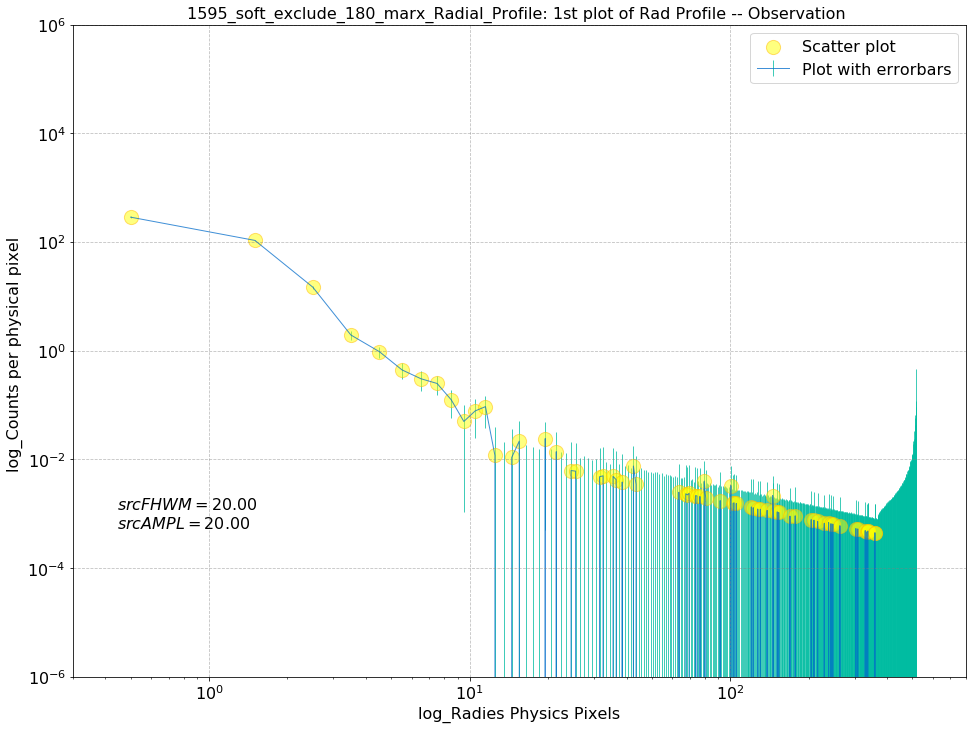



The second plot starts here:


This is your sky data :  physical
 crval    = [3691.5,3585.5]
 crpix    = [0.5,0.5]
 cdelt    = [1.,1.]
<class 'sherpa.astro.io.wcs.WCS'> type(sky_data)
1.0 sky_data.cdelt[0]
1.0 sky_data.cdelt[1]
What is the min background (look at 1st figure for min y values)and use exponetials eg 5e-3 1e-3
val         = 0.001
min         = nan
max         = 100.0
units       = 
frozen      = True
link        = None
default_val = 0.001
default_min = -3.4028234663852886e+38
default_max = 3.4028234663852886e+38 bgnd.c0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


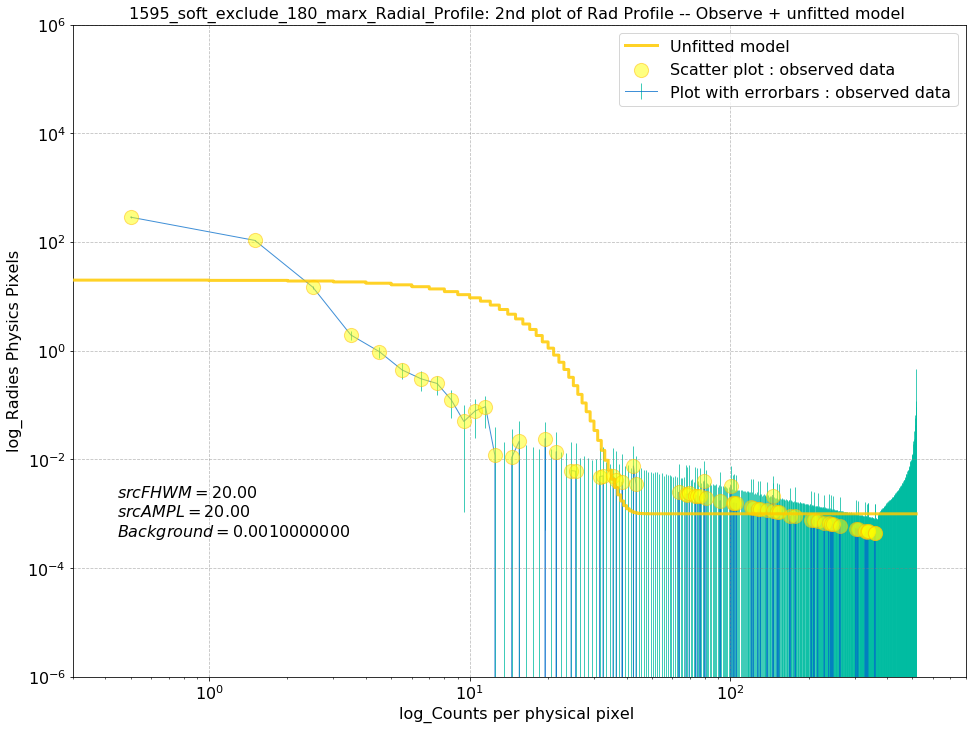



The third plot starts here:


20.0 src.fwhm.val guess from the src 
401.0 src.ampl.val guess from the src 
What should the FWHM of model be ?3
What should the amplitude be ?300
Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = -11751.4
Final fit statistic   = -12394.3 at function evaluation 161
Data points           = 537289
Degrees of freedom    = 537287
Change in statistic   = 642.904
   src.fwhm       2.42948     
   src.ampl       302.91      


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


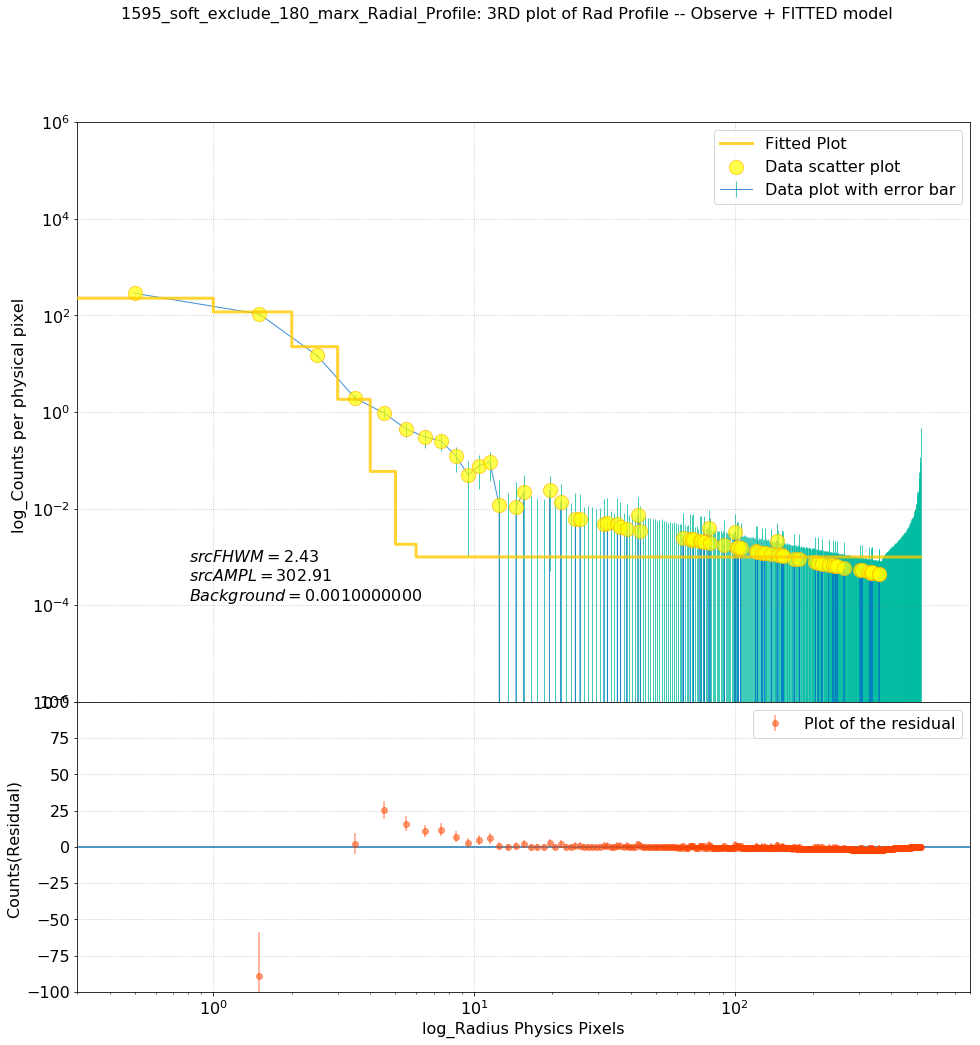



The 4th plot starts here:


What should the 2nd Gaussian FWHM be ?  ::5
What should the 2nd Gaussian maximum FWHM be ?  ::20
What should the 2nd Gaussian Amplitude be?  ::0.1
What should the 2nd Gaussian maximum Amplitude be?  ::1
5.0 core.fwhm.val after I have set it  
0.1 core.ampl.val after I have set it 
Model: 1
((gauss2d.src + const2d.bgnd) + gauss2d.core)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed      2.42948          0.1          300           
   src.xpos     frozen         4058         3000         6000           
   src.ypos     frozen         3952 -3.40282e+38  3.40282e+38           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed       302.91        0.401       401000           
   bgnd.c0      frozen        0.001          nan 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


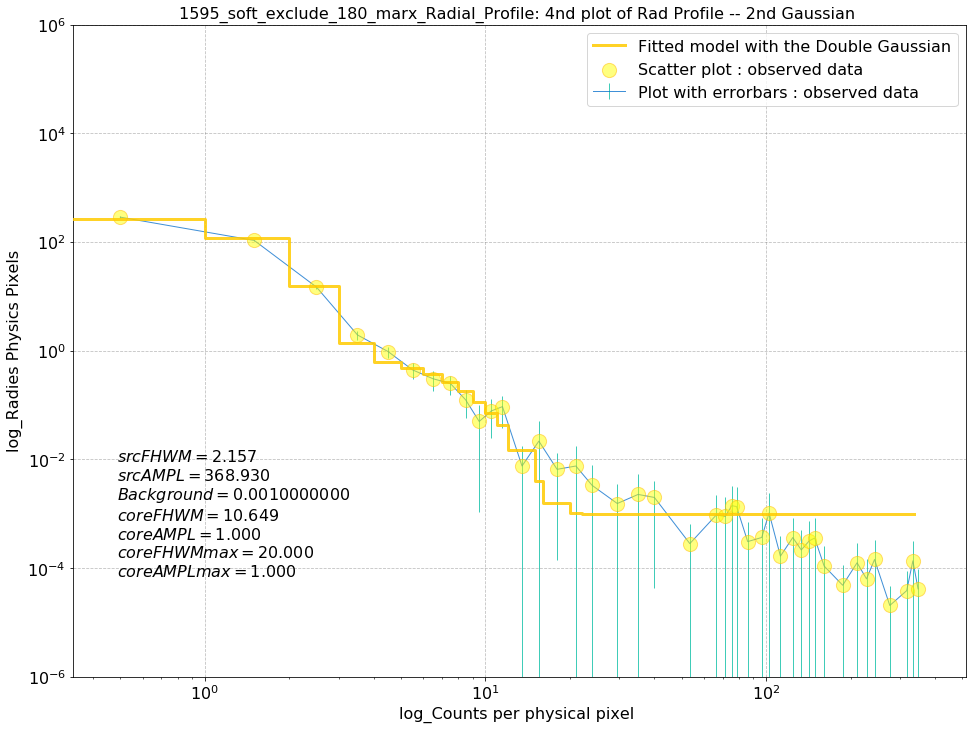



The 5th plot starts here:


DO NO FREEZE BOTH SRC AND CORE ! CHOOSE ONE OR THE OTHER !
Last chance to fix the core values
10.648652486517218 core.fwhm.val currently. 
20.0 core.fwhm.max currently. 
0.9999999193500979 core.ampl.val currently. 
1.0 core.ampl.max currently. 
I have thawed these. If you are not happy with these values, change it or keep it below:
What should the 2nd Gaussian FWHM be ?  ::10
What should the 2nd Gaussian maximum FWHM be ?  ::100
What should the 2nd Gaussian Amplitude be?  ::1
What should the 2nd Gaussian maximum Amplitude be?  ::5
Do you wannat freeze the core ampl and fwhm?yes --freeze it ; no -- take a chance ! no
Let us take a chance and NOT freeze the core values !
0.001 bgnd.c0.va; from initial 
What is the constant background -- look at where photons lie flat This is a more accurate way of estimating the background.  0.0001
0.0001 bgnd.c0.val after I froze it 
Dataset               = 1
Method                = neldermead
Statistic             = cash
I

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


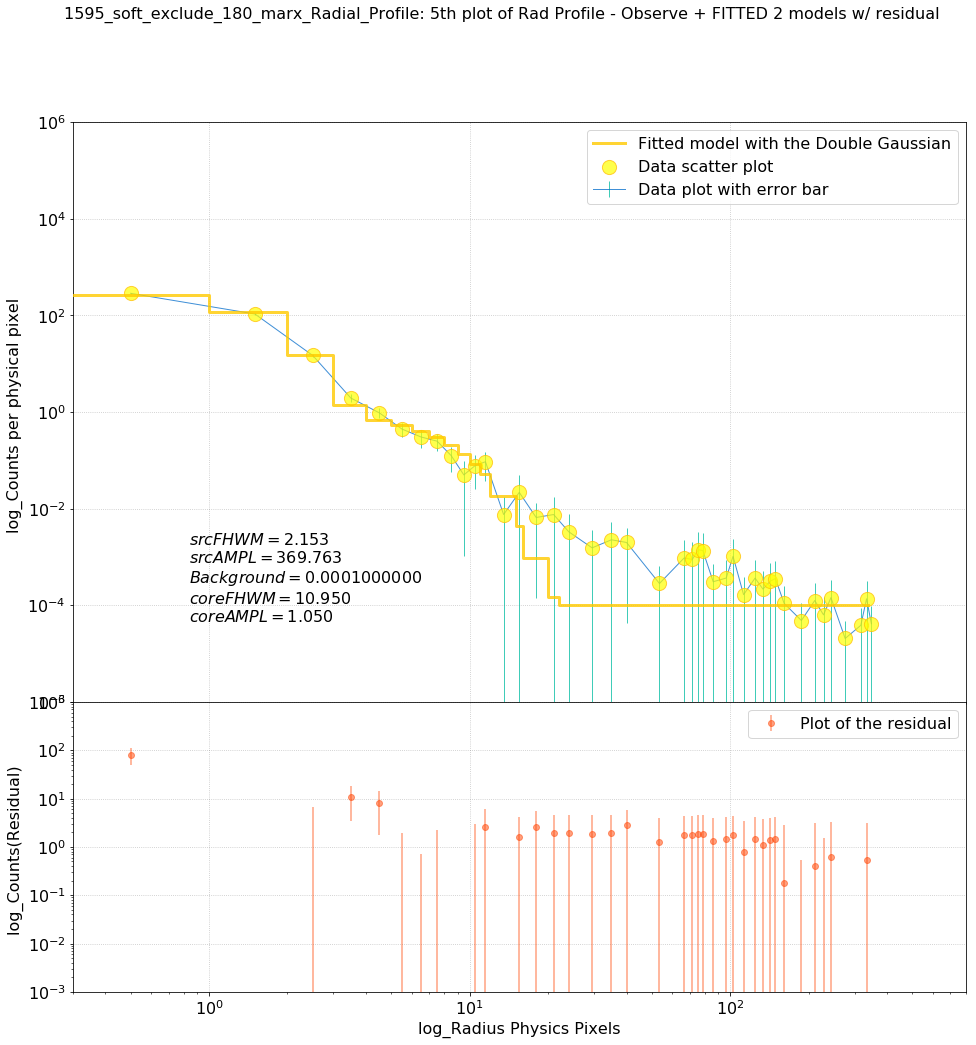



The 5Bth plot starts here:




'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


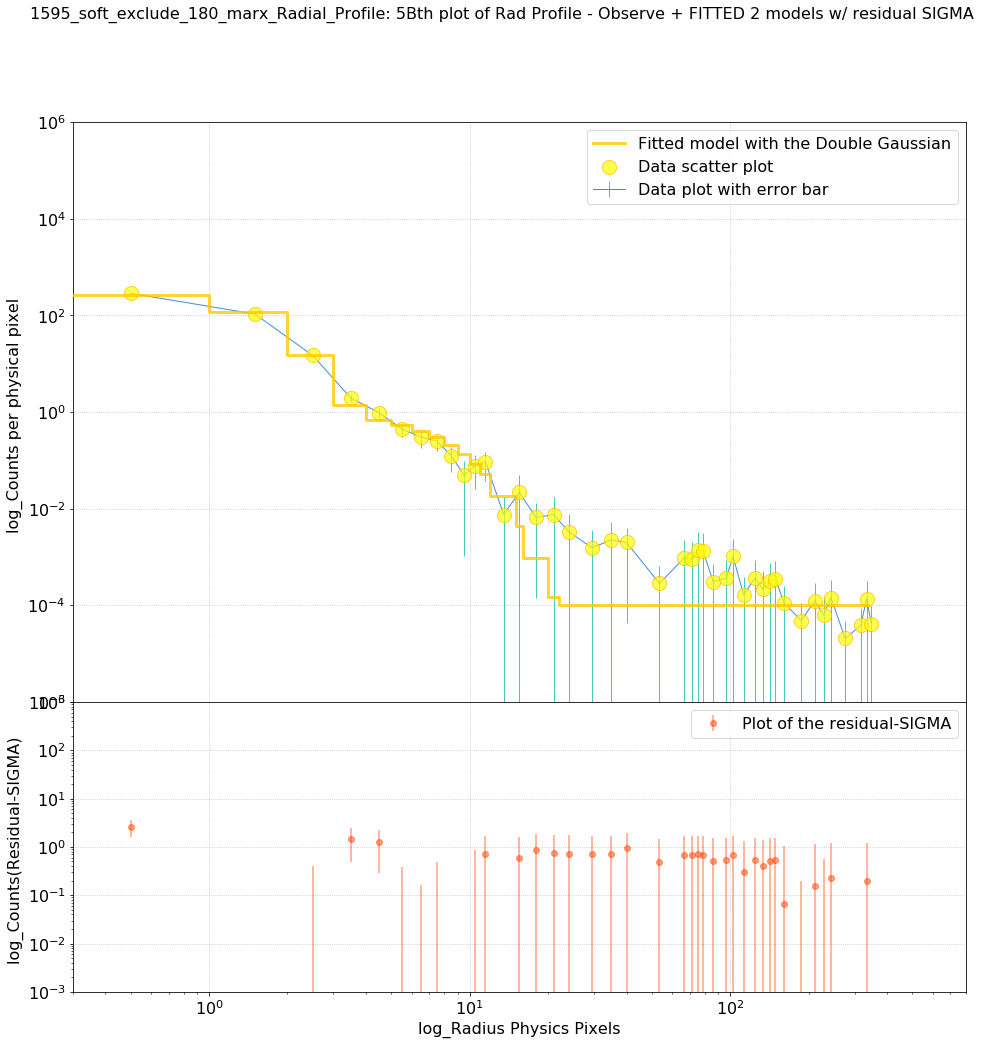



18700_soft_exclude_120 ObsidType
4116.9996 Ra 4127.9878 Dec Physical Units 
18700_soft_exclude_120_marx.reg LookAtThisRegion
18700_soft_exclude_120_bkg_marx.reg LookAtThisBkg


The 1st plot starts here:


gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed      2.15325          0.1          300           
   src.xpos     frozen         4117         3000         6000           
   src.ypos     frozen      4127.99 -3.40282e+38  3.40282e+38           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed          401        0.401       401000           
Model: 1
gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed        

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


xlo    = [  0.   1.   2. ... 343. 344. 345.]
xhi    = [  1.   2.   3. ... 344. 345. 346.]
y      = [111.3333  37.25     3.375  ...   0.       0.       0.    ]
yerr   = [6.4321 2.2855 0.525  ... 0.1555 0.2333 0.4665]
xlabel = Radius (physical pixel)
ylabel = Counts per physical pixel
labels = ['x$_0$ = 4116.9996', 'y$_0$ = 4127.9878']
title  = 18700_soft_exclude_120_blocked_marx_Radial_Profile.fits
histo_prefs = {'linecolor': None, 'xlog': False, 'markerfacecolor': 'none', 'color': None, 'ylog': False, 'ecolor': None, 'capsize': None, 'barsabove': False, 'linestyle': '', 'yerrorbars': True, 'markersize': 4, 'marker': 'o'} radial
<class 'sherpa_contrib.profiles.RadialProfile'>
(346,) xlo.shape
18700_soft_exclude_120_blocked_marx_Radial_Profile N : we are running marx


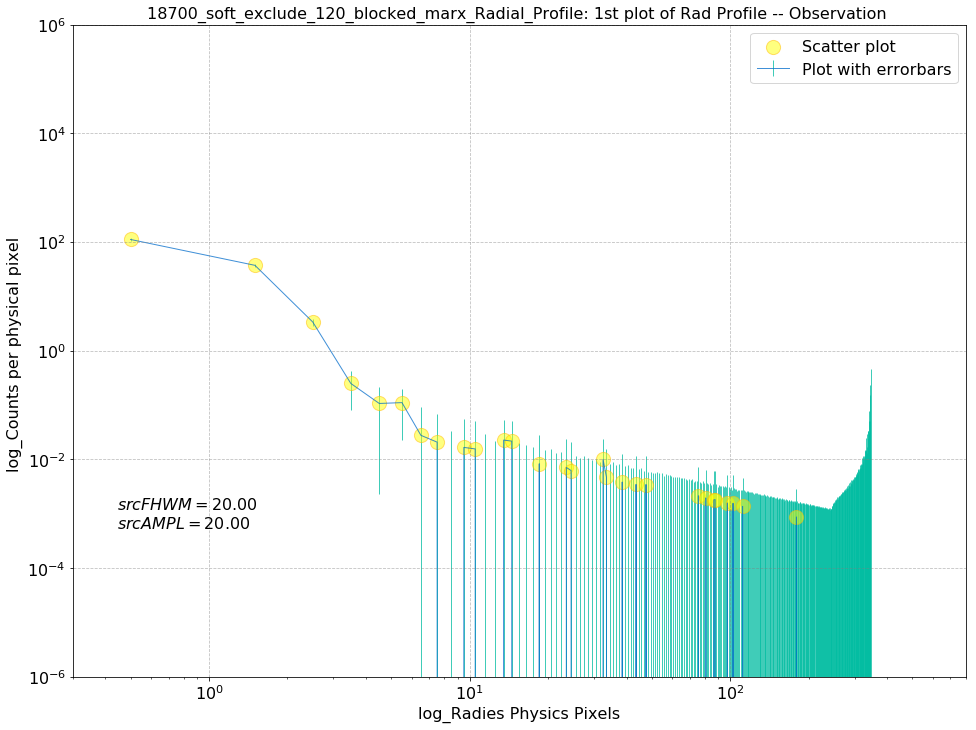



The second plot starts here:


This is your sky data :  physical
 crval    = [3872.5,3883.5]
 crpix    = [0.5,0.5]
 cdelt    = [1.,1.]
<class 'sherpa.astro.io.wcs.WCS'> type(sky_data)
1.0 sky_data.cdelt[0]
1.0 sky_data.cdelt[1]
What is the min background (look at 1st figure for min y values)and use exponetials eg 5e-3 1e-3
val         = 0.001
min         = nan
max         = 100.0
units       = 
frozen      = True
link        = None
default_val = 0.001
default_min = -3.4028234663852886e+38
default_max = 3.4028234663852886e+38 bgnd.c0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


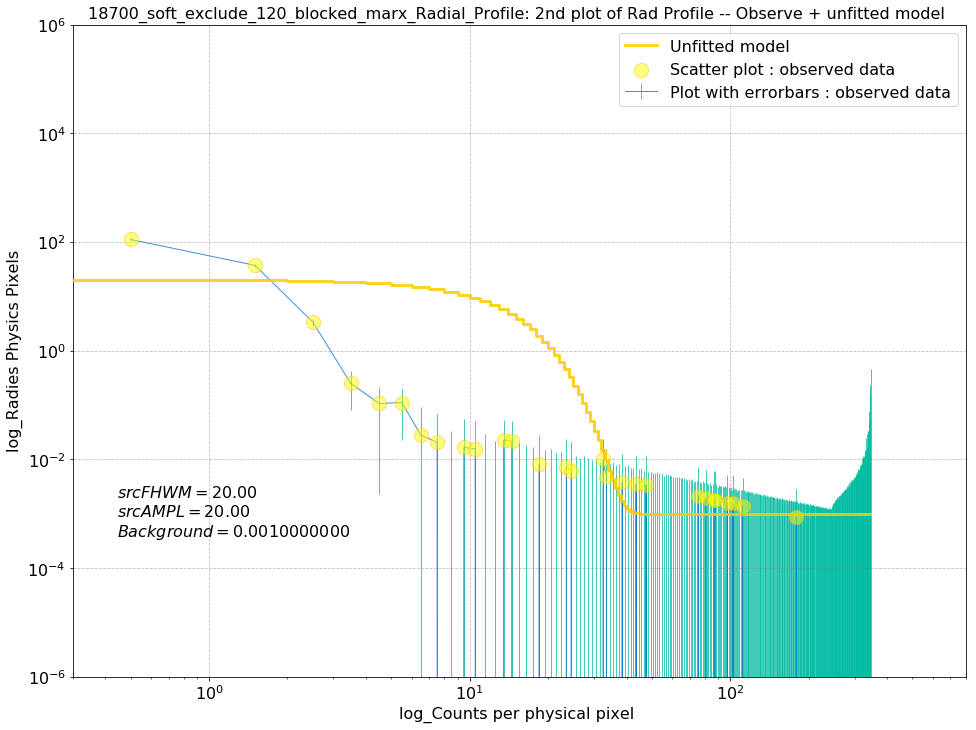



The third plot starts here:


20.0 src.fwhm.val guess from the src 
178.0 src.ampl.val guess from the src 
What should the FWHM of model be ?3
What should the amplitude be ?100
Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = -2865.77
Final fit statistic   = -3302.99 at function evaluation 223
Data points           = 239121
Degrees of freedom    = 239119
Change in statistic   = 437.211
   src.fwhm       1.99033     
   src.ampl       154.164     


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


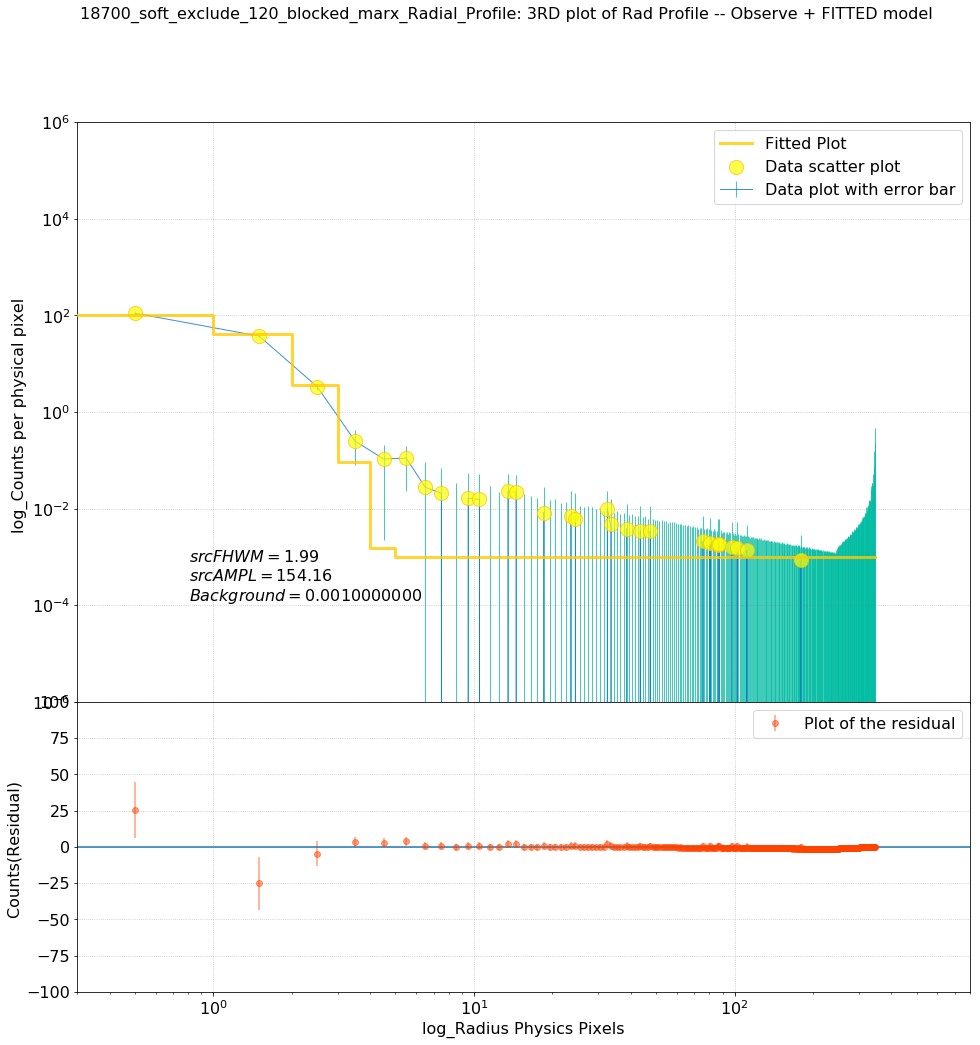



The 4th plot starts here:


What should the 2nd Gaussian FWHM be ?  ::7
What should the 2nd Gaussian maximum FWHM be ?  ::20
What should the 2nd Gaussian Amplitude be?  ::0.1
What should the 2nd Gaussian maximum Amplitude be?  ::1
7.0 core.fwhm.val after I have set it  
0.1 core.ampl.val after I have set it 
Model: 1
((gauss2d.src + const2d.bgnd) + gauss2d.core)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed      1.99033          0.1          300           
   src.xpos     frozen         4117         3000         6000           
   src.ypos     frozen      4127.99 -3.40282e+38  3.40282e+38           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed      154.164        0.178       178000           
   bgnd.c0      frozen        0.001          nan 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


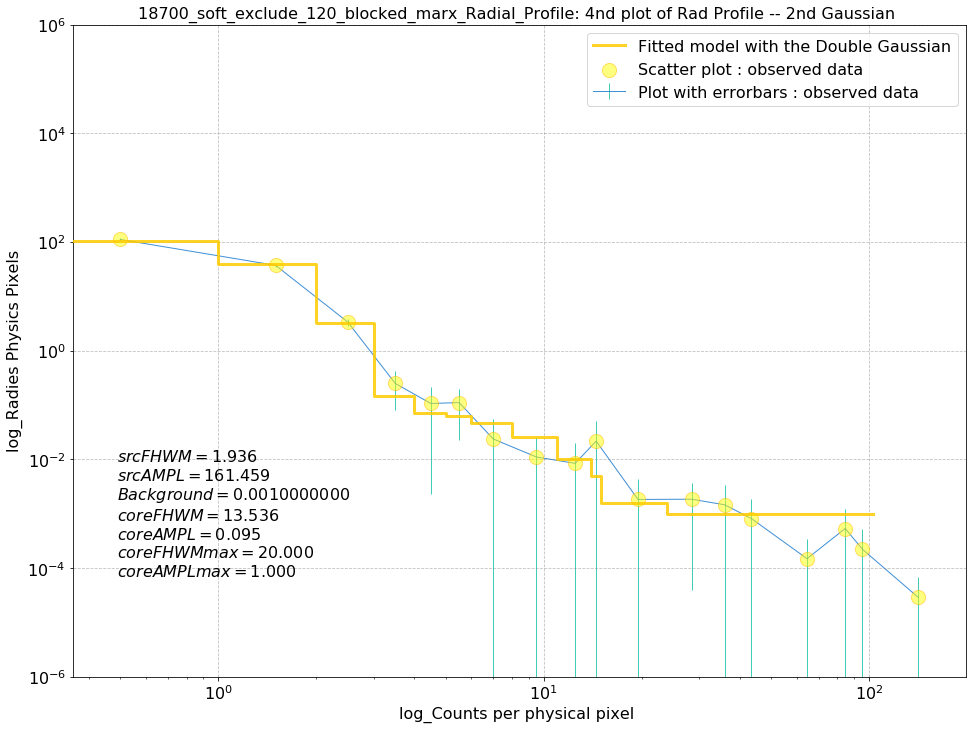



The 5th plot starts here:


DO NO FREEZE BOTH SRC AND CORE ! CHOOSE ONE OR THE OTHER !
Last chance to fix the core values
13.535797497742836 core.fwhm.val currently. 
20.0 core.fwhm.max currently. 
0.09545307422267851 core.ampl.val currently. 
1.0 core.ampl.max currently. 
I have thawed these. If you are not happy with these values, change it or keep it below:
What should the 2nd Gaussian FWHM be ?  ::13
What should the 2nd Gaussian maximum FWHM be ?  ::20
What should the 2nd Gaussian Amplitude be?  ::0.09
What should the 2nd Gaussian maximum Amplitude be?  ::1
Do you wannat freeze the core ampl and fwhm?yes --freeze it ; no -- take a chance ! no
Let us take a chance and NOT freeze the core values !
0.001 bgnd.c0.va; from initial 
What is the constant background -- look at where photons lie flat This is a more accurate way of estimating the background.  0.001
0.001 bgnd.c0.val after I froze it 
Dataset               = 1
Method                = neldermead
Statistic             = cash


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


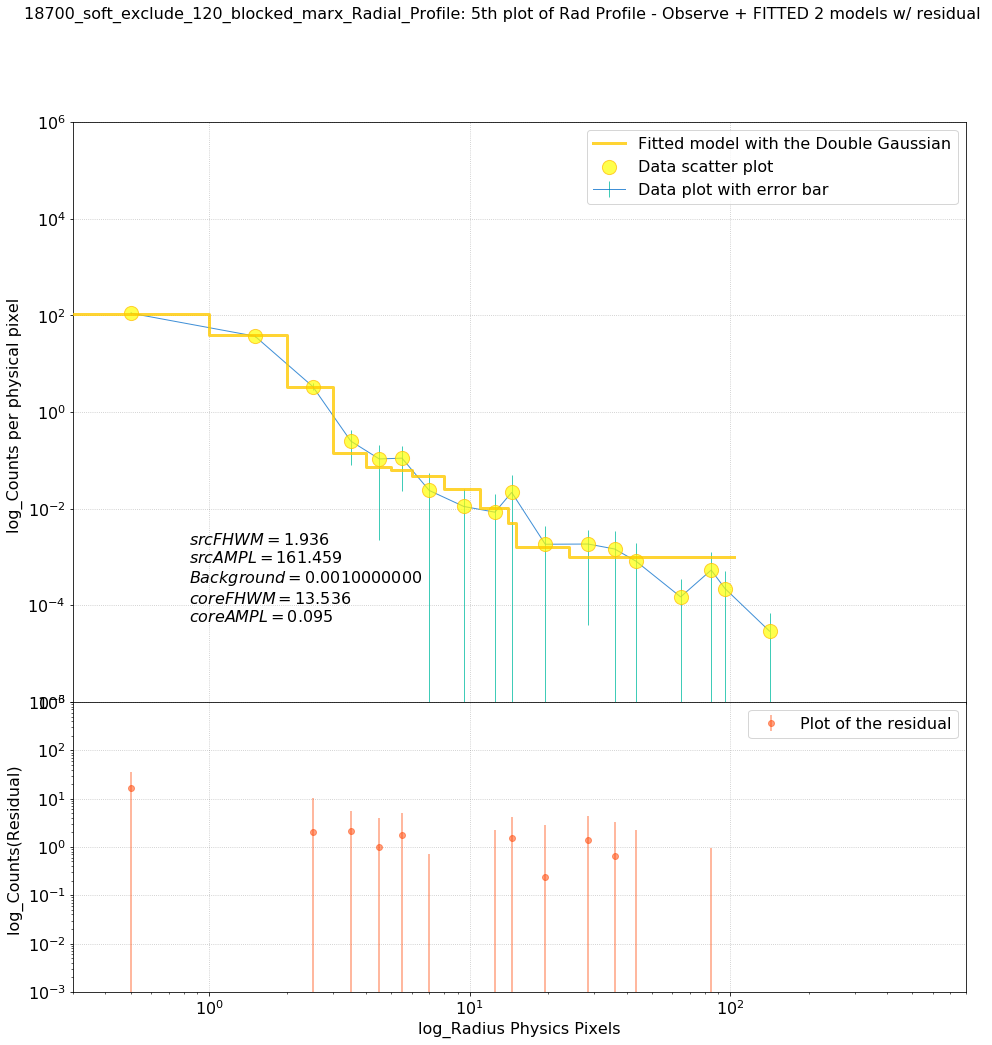



The 5Bth plot starts here:




'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


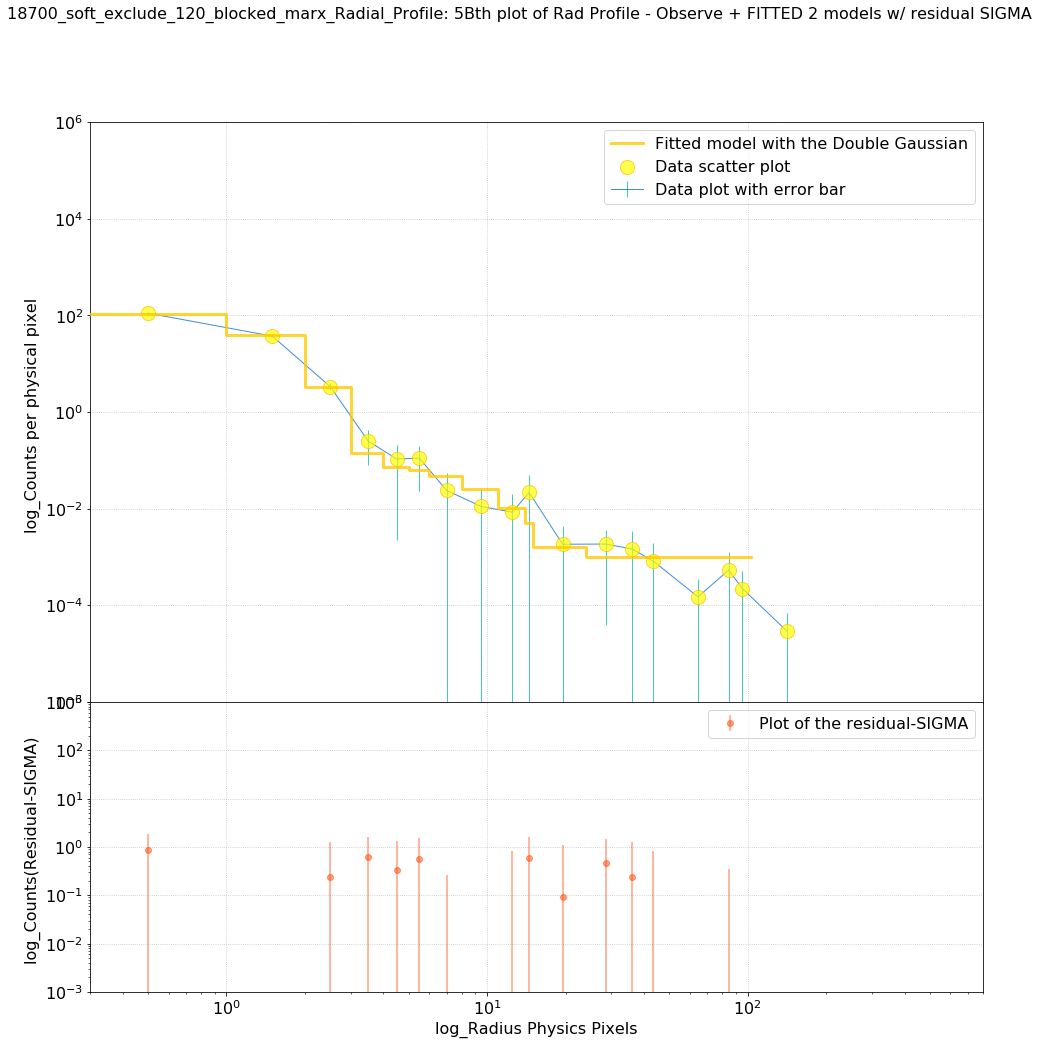

In [269]:
# ''' This is the Radial Profile for the MARX version of the observed quasar !!!! '''
print('Let us make that radial profile of the MARX  !!!! ')

# OK, at least images and decide which ones are OK to use !!!
for i in range(len(LIST)): 
    
    ###########This whole block is the same as in part B) ############
    print('\n')
    RADIUS = int(RLIST[i])
    Obsid = str(LIST[i])
    Lensed= str(LLIST[i])
    DidYouBlockJet = WasTheRegContanminated(Obsid)
    #print(DidYouBlockJet,'DidYouBlockJet')
    ObsidType = ComeUpWithObsidName(IsItSoft,DidYouBlockJet,Obsid,RADIUS )
    print(ObsidType,'ObsidType')


    ###########This whole block is the same as in part B) ############
    
    # Check the RA & DEC THAT YOU WANT 
    
    # You should get this from part B)
    REG  = str(ObsidType+".reg")        
    ra,dec = GiveMeRaAndDec(REG)
    print(ra,'Ra',dec,'Dec','Physical Units ')
    
    LookAtThisRegion = str(ObsidType+'_marx.reg')
    LookAtThisBkg = str(ObsidType+'_bkg_marx.reg')
    
    print(LookAtThisRegion,'LookAtThisRegion')
    print(LookAtThisBkg,'LookAtThisBkg')
    
    try:
        # Does the marx file have anything blocked 

        MarxFile = str(ObsidType+'_blocked_marx_image.fits')
        MarxType = str(ObsidType+'_blocked_marx')
    
        dmcopy(str(MarxFile+'[sky=region('+LookAtThisRegion+')][bin sky]'), 
               str(MarxType+'_Radial_Profile.fits'), # THIS IS THE FINAL IMAGE/NAME TO USE
               clobber='yes') 
    
        dmcopy(str(MarxFile+'[sky=region('+LookAtThisBkg+')][bin sky]'), 
               str(MarxType+'_Radial_Profile_bkg.fits'), # THIS IS THE FINAL IMAGE/NAME TO USE
               clobber='yes')
    except:
        # No it does not 
        MarxFile = str(ObsidType+'_marx_image.fits')
        MarxType = str(ObsidType+'_marx')        
        
        dmcopy(str(MarxFile+'[sky=region('+LookAtThisRegion+')][bin sky]'), 
               str(MarxType+'_Radial_Profile.fits'), # THIS IS THE FINAL IMAGE/NAME TO USE
               clobber='yes') 
    
        dmcopy(str(MarxFile+'[sky=region('+LookAtThisBkg+')][bin sky]'), 
               str(MarxType+'_Radial_Profile_bkg.fits'), # THIS IS THE FINAL IMAGE/NAME TO USE
               clobber='yes')
    
    
    
    N = str(MarxType+'_Radial_Profile')
    C1 = ra
    C2 = dec
    R = RADIUS
    B = str(MarxType+'_Radial_Profile_bkg')

    # If you need to, just open it to check it , or just run it 
    #subprocess.Popen(["ds9", str(ObsidType+'_Radial_Profile.fits')])
    # or 
    radial=fitMe2GaussianORIGINAL(N,C1,C2,R,Lensed,IsItSoft,B)

In [ ]:
''' Now that you have done the marx version, perhaps you want to do the observation version
'''

Let us make that radial profile !!!! 


9398_soft_exclude_180 ObsidType
9398/repro/acisf09398_repro_evt2.fits OriginalRepro
9398_soft_exclude_180_evt2.fits , This is the file that you can use from now on .
9398_soft_exclude_180_evt2.fits ReproFile
4045 Ra 3952 Dec Physical Units 
9398_soft_exclude_180.reg LookAtThisRegion
9398_soft_exclude_180_bkg.reg LookAtThisBkg
9398_soft_exclude_180_Radial_Profile.fits This is the final image name !!


The 1st plot starts here:


gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed           20          0.1          300           
   src.xpos     frozen         4045         3000         6000           
   src.ypos     frozen         3952 -3.40282e+38  3.40282e+38           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   sr

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


xlo    = [  0.   1.   2. ... 515. 516. 517.]
xhi    = [  1.   2.   3. ... 516. 517. 518.]
y      = [221.25    72.2222  77.2353 ...   0.       0.       0.    ]
yerr   = [7.6904 2.9455 2.1909 ... 0.1333 0.2073 1.866 ]
xlabel = Radius (physical pixel)
ylabel = Counts per physical pixel
labels = ['x$_0$ = 4045.0', 'y$_0$ = 3952.0']
title  = 9398_soft_exclude_180_Radial_Profile.fits
histo_prefs = {'linecolor': None, 'xlog': False, 'markerfacecolor': 'none', 'color': None, 'ylog': False, 'ecolor': None, 'capsize': None, 'barsabove': False, 'linestyle': '', 'yerrorbars': True, 'markersize': 4, 'marker': 'o'} radial
<class 'sherpa_contrib.profiles.RadialProfile'>
(518,) xlo.shape
9398_soft_exclude_180_Radial_Profile N : we are running running the actual observed quantity


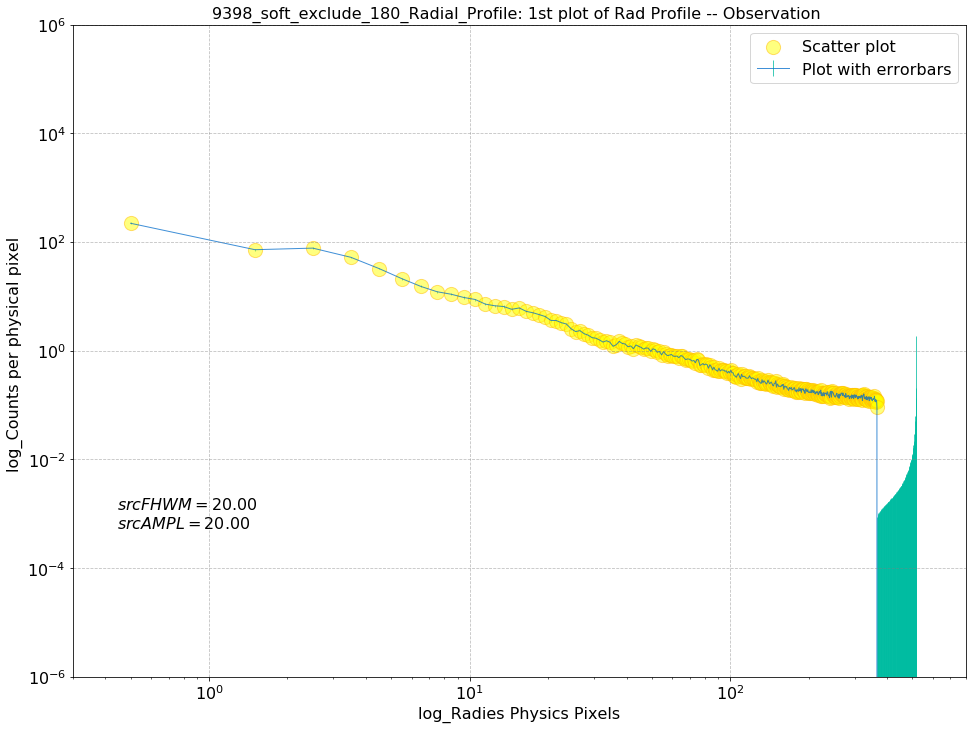



The second plot starts here:


This is your sky data :  physical
 crval    = [3679.1463,3586.1463]
 crpix    = [0.5,0.5]
 cdelt    = [1.,1.]
<class 'sherpa.astro.io.wcs.WCS'> type(sky_data)
1.0 sky_data.cdelt[0]
1.0 sky_data.cdelt[1]
What is the min background (look at 1st figure for min y values)and use exponetials eg 5e-3 0.1
val         = 0.1
min         = nan
max         = 100.0
units       = 
frozen      = True
link        = None
default_val = 0.1
default_min = -3.4028234663852886e+38
default_max = 3.4028234663852886e+38 bgnd.c0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


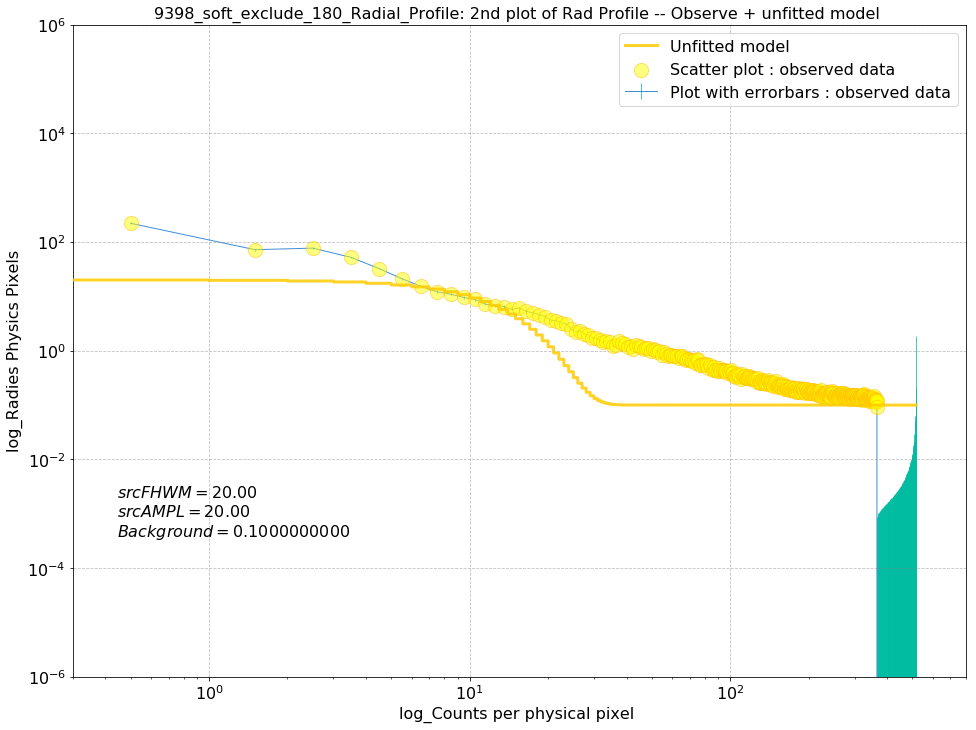



The third plot starts here:


20.0 src.fwhm.val guess from the src 
524.0 src.ampl.val guess from the src 
What should the FWHM of model be ?2
What should the amplitude be ?500
Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = 555464
Final fit statistic   = 429813 at function evaluation 272
Data points           = 535824
Degrees of freedom    = 535822
Change in statistic   = 125651
   src.fwhm       95.0052     
   src.ampl       3.77384     


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


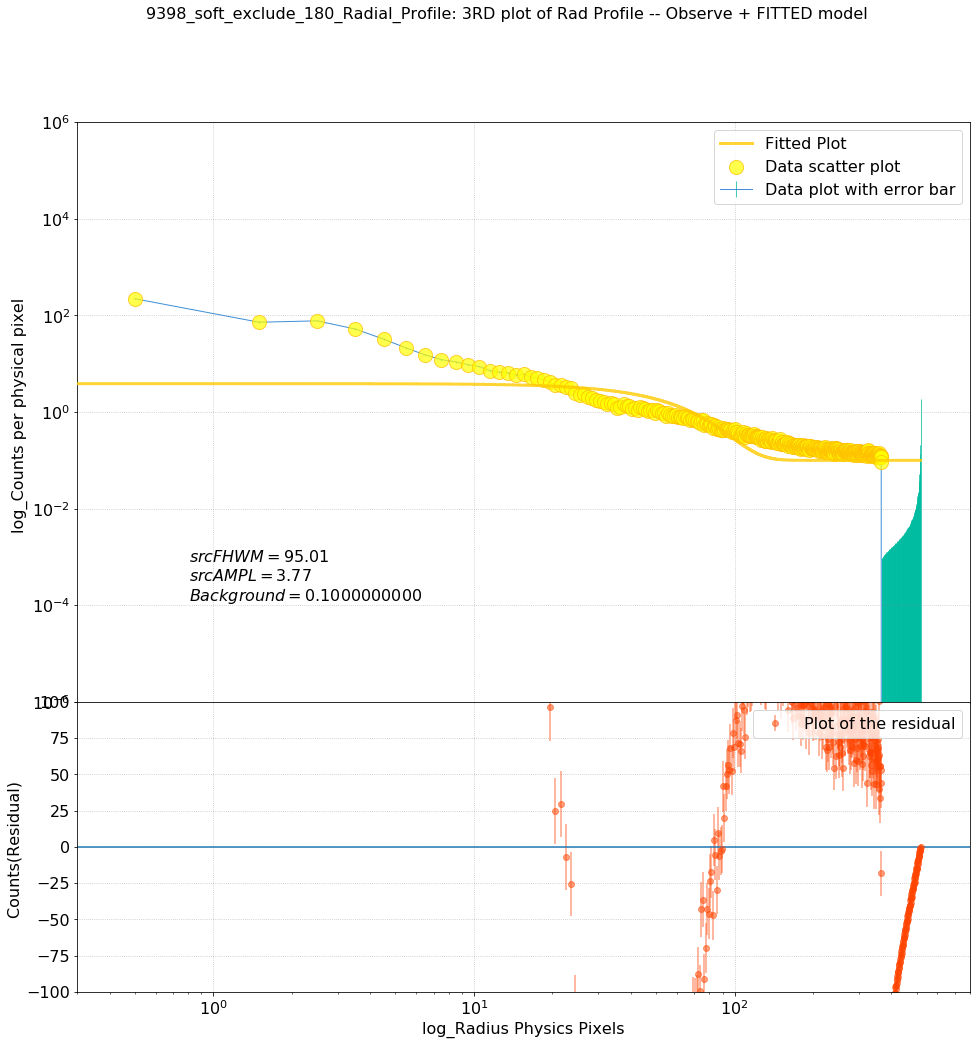



The 4th plot starts here:


What should the 2nd Gaussian FWHM be ?  ::2
What should the 2nd Gaussian maximum FWHM be ?  ::10
What should the 2nd Gaussian Amplitude be?  ::100
What should the 2nd Gaussian maximum Amplitude be?  ::1000
2.0 core.fwhm.val after I have set it  
100.0 core.ampl.val after I have set it 
Model: 1
((gauss2d.src + const2d.bgnd) + gauss2d.core)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed      95.0052          0.1          300           
   src.xpos     frozen         4045         3000         6000           
   src.ypos     frozen         3952 -3.40282e+38  3.40282e+38           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed      3.77384        0.524       524000           
   bgnd.c0      frozen          0.1         

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


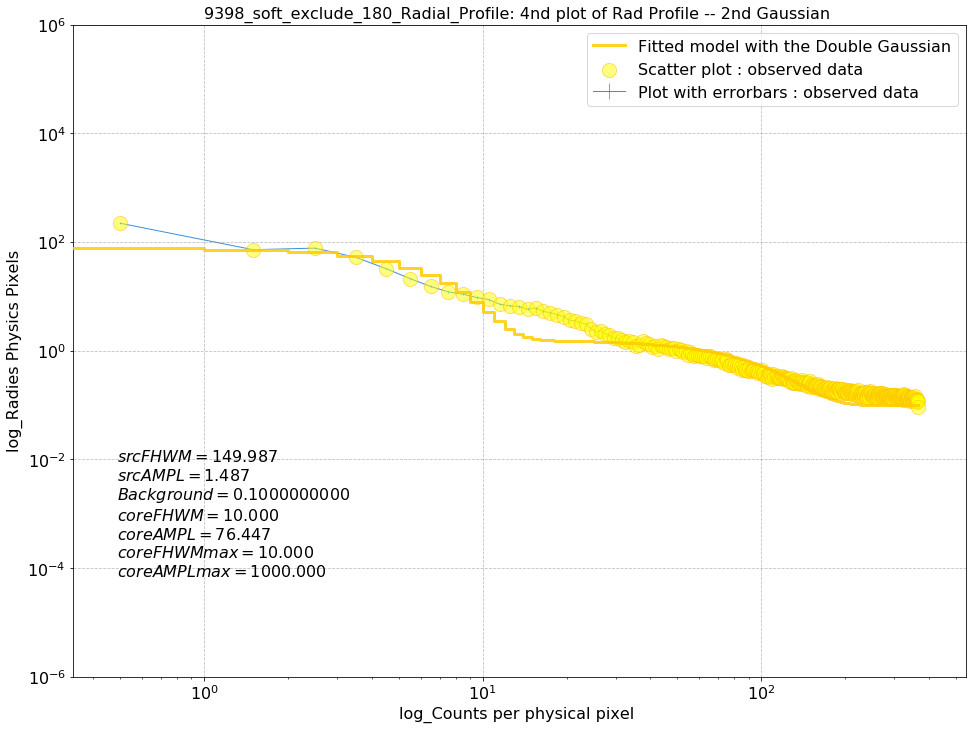



The 5th plot starts here:


DO NO FREEZE BOTH SRC AND CORE ! CHOOSE ONE OR THE OTHER !
Last chance to fix the core values
9.999999997061346 core.fwhm.val currently. 
10.0 core.fwhm.max currently. 
76.44658332780755 core.ampl.val currently. 
1000.0 core.ampl.max currently. 
I have thawed these. If you are not happy with these values, change it or keep it below:
What should the 2nd Gaussian FWHM be ?  ::3
What should the 2nd Gaussian maximum FWHM be ?  ::6
What should the 2nd Gaussian Amplitude be?  ::100
What should the 2nd Gaussian maximum Amplitude be?  ::400
Do you wannat freeze the core ampl and fwhm?yes --freeze it ; no -- take a chance ! no
Let us take a chance and NOT freeze the core values !
0.1 bgnd.c0.va; from initial 
What is the constant background -- look at where photons lie flat This is a more accurate way of estimating the background.  0.1
0.1 bgnd.c0.val after I froze it 
Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


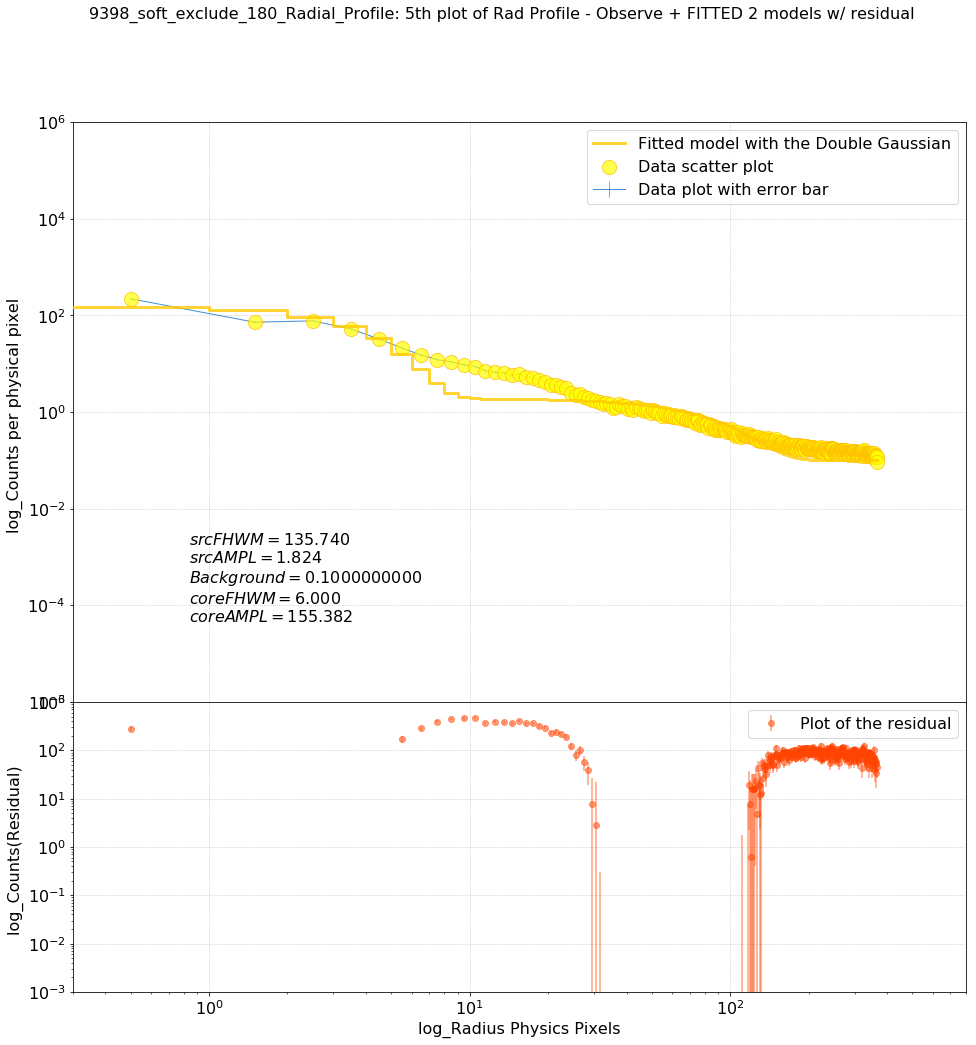



The 5Bth plot starts here:




'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


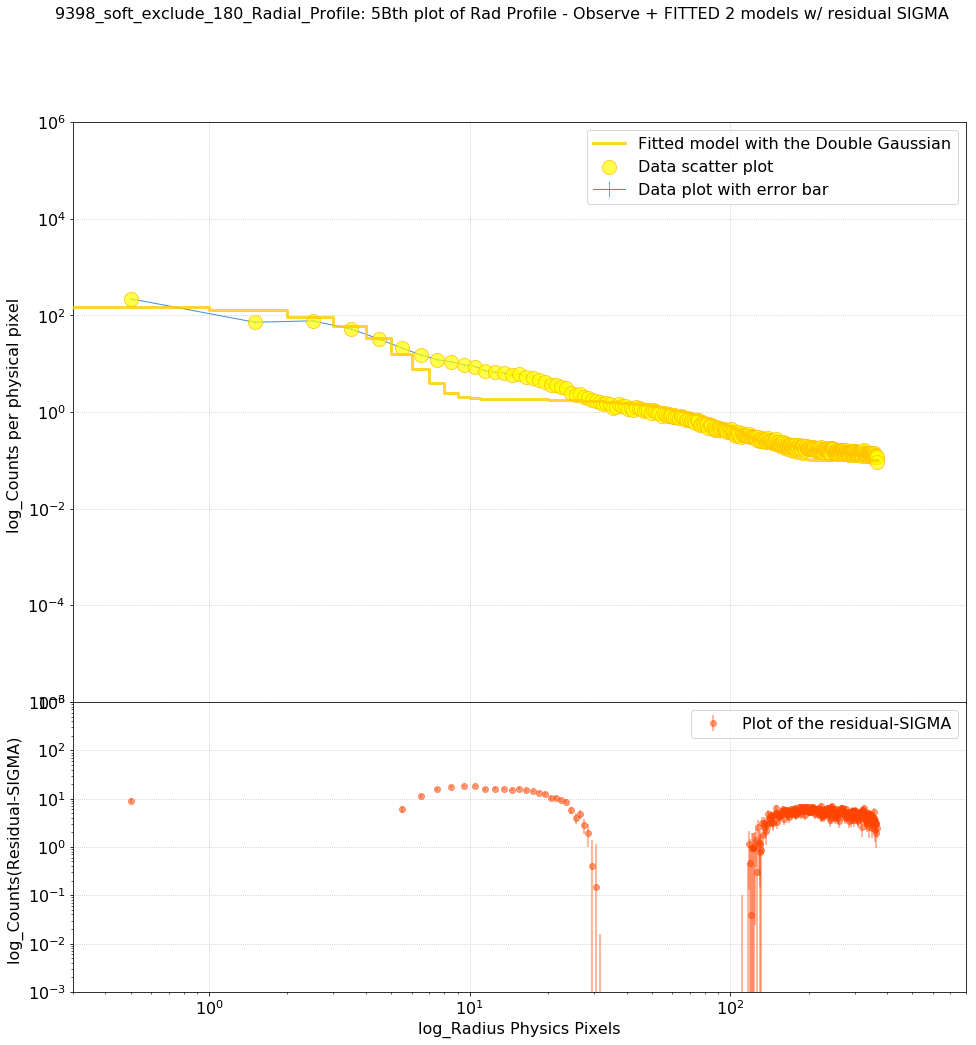

In [266]:
''' This is the Radial Profile for the observed quasar !!!! '''
print('Let us make that radial profile !!!! ')

# OK, at least images and decide which ones are OK to use !!!
for i in range(len(LIST)): 
    
    ###########This whole block is the same as in part B) ############
    print('\n')
    RADIUS = int(RLIST[i])
    Obsid = str(LIST[i])
    Lensed= str(LLIST[i])
    DidYouBlockJet = WasTheRegContanminated(Obsid)
    #print(DidYouBlockJet,'DidYouBlockJet')
    ObsidType = ComeUpWithObsidName(IsItSoft,DidYouBlockJet,Obsid,RADIUS )
    print(ObsidType,'ObsidType')
    # We name it very early on, so that there is no confusion 
    ObsidZero = AddZerosToObsid(Obsid)
    
    # OK, this is the original event file
    OriginalRepro = str(Obsid+'/repro/acisf'+ ObsidZero+'_repro_evt2.fits')
    print(OriginalRepro,'OriginalRepro')

    # Essentially, this Reprofile will be the event file 
    # minus away the contaminated region 
    ReproFile = ExcludePartsOfSkyInEventFile(IsItSoft,DidYouBlockJet,Obsid,ObsidZero,RADIUS)
    print(ReproFile,'ReproFile') # we will use this much much later in place of .....image.fits

    ###########This whole block is the same as in part B) ############
    
    # Check the FK RA & DEC THAT YOU WANT 
    
    REG  = str(ObsidType+".reg")        
    ra,dec = GiveMeRaAndDec(REG)
    print(ra,'Ra',dec,'Dec','Physical Units ')
    
    LookAtThisRegion = str(ObsidType+'.reg')
    LookAtThisBkg = str(ObsidType+'_bkg.reg')
    
    print(LookAtThisRegion,'LookAtThisRegion')
    print(LookAtThisBkg,'LookAtThisBkg')
    
    dmcopy(str(ReproFile+'[sky=region('+LookAtThisRegion+')][bin sky]'), 
               str(ObsidType+'_Radial_Profile.fits'), # THIS IS THE FINAL IMAGE/NAME TO USE
               clobber='yes') 
    
    dmcopy(str(ReproFile+'[sky=region('+LookAtThisBkg+')][bin sky]'), 
               str(ObsidType+'_Radial_Profile_bkg.fits'), # THIS IS THE FINAL IMAGE/NAME TO USE
               clobber='yes')
    
    print(str(ObsidType+'_Radial_Profile.fits'),'This is the final image name !!')
    
    
    N = str(ObsidType+'_Radial_Profile')
    C1 = ra
    C2 = dec
    R = RADIUS
    B = str(ObsidType+'_Radial_Profile_bkg')

    # If you need to, just open it to check it , or just run it 
    #subprocess.Popen(["ds9", str(ObsidType+'_Radial_Profile.fits')])
    # or 
    radial=fitMe2GaussianORIGINAL(N,C1,C2,R,Lensed,IsItSoft,B)


In [88]:
#S

In [ ]:
#T

In [ ]:
#O

In [ ]:
#P

In [ ]:
# H.A.M.M.E.R T.I.M.E

In [ ]:
'''Everything below is just for debugging. '''

In [ ]:
N = str('18701_exclude') 
C1 = 4117
C2 = 4128
R = 40

radial=fitMe2GaussianORIGINAL(N,C1,C2,R)

In [260]:
print(radial2)

NameError: name 'radial2' is not defined

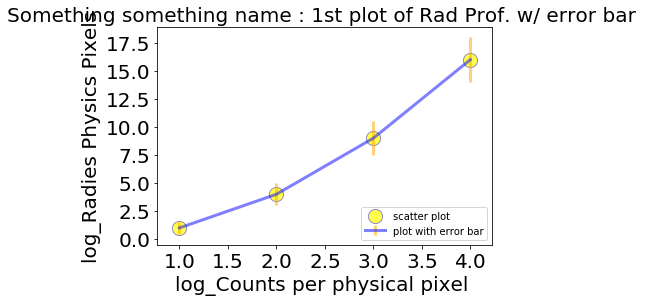

In [152]:
'''Just debugging '''
fig = plt.figure()
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
e = [0.5, 1., 1.5, 2.]

plt.errorbar(x, y, yerr=e,ecolor='orange',c='blue',lw=3,alpha=0.5,label='plot with error bar')
plt.scatter(x,y,c='yellow',marker='o',edgecolors='slateblue',s=200,alpha = 0.7,label='scatter plot')
N = str('Something something name ')
title = str(N+": 1st plot of Rad Prof. w/ error bar ")
plt.title(title,fontsize=20)
plt.xlabel('log_Counts per physical pixel ',fontsize=20)
plt.ylabel('log_Radies Physics Pixels',fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc='lower right')
plt.savefig('testing.pdf')
plt.show()


In [17]:
DATALIST= [1,2,3]
DATA=np.asarray(DATALIST)
print(DATA)

[1 2 3]


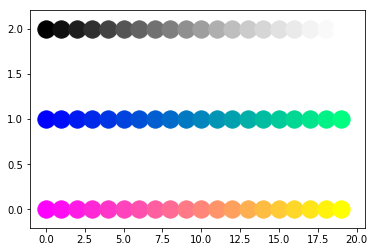

In [563]:
'''MY CRAYONS'''
for i in range(0,20):
    plt.scatter(i,0,s=300,color=colorS[i])
    plt.scatter(i,1,s=300,color=colorW[i])
    plt.scatter(i,2,s=300,color=colorG[i])

/Users/tzegoh/Desktop/ciao/ciao-4.12/ots/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


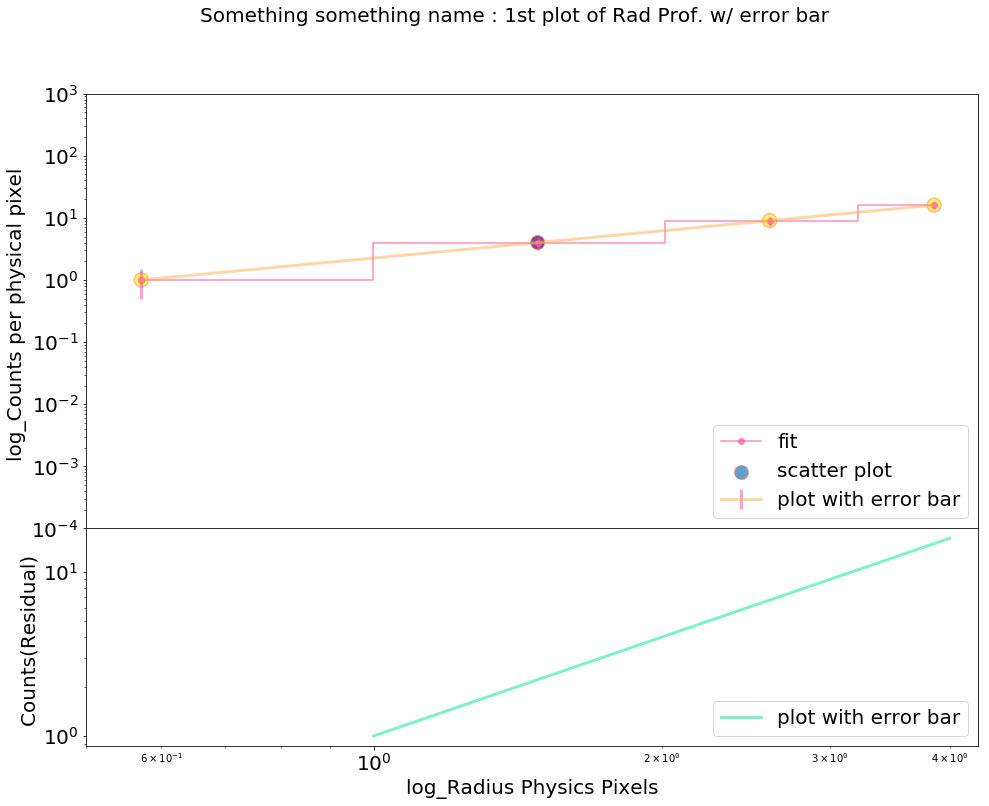

In [565]:
'''Just debugging '''
fig, (ax1, ax2) = plt.subplots(2,figsize=(16, 12))
#fig = plt.figure()
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
e = [0.5, 1., 1.5, 2.]

#SPLIT IT 
gs = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 1],wspace=0.0,hspace=0.0)
#PLOT IT 
ax1 = plt.subplot(gs[0])
ax1.errorbar(x, y, yerr=e,ecolor=colorS[5],c=colorS[13],lw=3,alpha=0.5,label='plot with error bar')
ax1.scatter(x,y,c=colorS[0],marker='o',edgecolors=colorS[10],s=200,alpha = 0.7,label='scatter plot')
ax1.step(x,y,c=colorS[7],marker='o',alpha = 0.7, where='mid',ls=':' ,label='fit')
ax2 = plt.subplot(gs[1])
ax2.plot(x, y,c=colorW[17],lw=3,alpha=0.5,label='plot with error bar')

#TITLE
N = str('Something something name ')
title = str(N+": 1st plot of Rad Prof. w/ error bar ")
fig.suptitle(title,fontsize=20)
#LABELLING
ax1.set_ylabel('log_Counts per physical pixel ',fontsize=20)
ax2.set_ylabel('Counts(Residual) ',fontsize=20)
ax2.set_xlabel('log_Radius Physics Pixels',fontsize=20)
#LOG
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
#LIMITS
ax1.set_ylim(bottom = 1e-4,top=1000)
ax2.set_xlim(left=0.5)
#TICK PARAMETERS
ax1.tick_params(axis='both',labelsize = 20)
ax2.tick_params(axis='both',labelsize = 20)
#LEGEND
ax1.legend(loc='lower right',fontsize = 20)
ax2.legend(loc='lower right',fontsize = 20)
#SAVE IT 
plt.savefig('testing2.pdf')
plt.show()

In [396]:
# 2241
N = str('2241_soft_marx') 
C1 = 4029
C2 = 4120
R = 40

radial=fitMe2GaussianORIGINAL(N,C1,C2,R)



The 1st plot starts here:




OSError: File 2241_soft_marx.fits does not exist.

In [36]:
print(radial)
print(type(radial))

<function get_data_prof at 0x122027e18>
<class 'function'>


In [27]:
#47 vs 1269

N = str('47_marx') #1269#47
C1 =  4095#4073#4095
C2 =  4063#4129#4063
R = 40


fitMe2GaussianORIGINAL(N,C1,C2,R)

gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed           20          0.1          300           
   src.xpos     frozen         4095         3000         6000           
   src.ypos     frozen         4063 -3.40282e+38  3.40282e+38           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed          219        0.219       219000           


KeyboardInterrupt: 

In [14]:
def fitMe2Gaussian(N,C1,C2,R,X,H,Theta):
    ''' This should fit you with 2 gaussians for source and background '''
    N = str(N)     # Name
    C1 = str(C1)   # RA
    C2 = str(C2)   # Dec
    R = str(R)     # Radius   
    
    #Load that image
    name = str(N + "_image1.fits")
    load_image(name)
    
    # Get the right coordinates
    set_coord("physical")
    set_stat("cash")
    set_method("simplex")
    get_coord()
    get_stat_name()
    get_method_name()
    
    # You are just limiting the region
    region = str("circle(" + C1 + "," + C2 + "," + R + ")")
    notice2d(region)
    
    # This is the first Gaussian
    set_source(gauss2d.src)
    guess(src)
    print('src',src)
    #freeze(src.xpos)
    #freeze(src.ypos)
    set_par(src.fwhm, min=0.1, max=300, val=20)
    set_par(src.ampl, min=0.1, max=1000, val=20)
    print('show_model()')
    show_model()

    # Gets the radial profile
    prof_data(theta = Theta)  # this command plots the data points radial profile 
    dataProf = get_data_prof()
    log_scale()
    limits(X_AXIS, 0.5, AUTO)

    # Modelling w/o fitting yet 
    print(get_data().sky)
    set_source(src + const2d.bgnd)
    bgnd.c0 = 0.2
    bgnd.c0.max = 100
    get_data_prof_prefs()["xlog"] = True
    get_data_prof_prefs()["ylog"] = True
    #freeze(src.xpos)
    #freeze(src.ypos)
    prof_fit(label=False)   # this command plots the fit of the radial profile 
    limits(X_AXIS, 0.5, AUTO)

    # Modelling w/ fitting
    src.fwhm = src.fwhm.val * X 	# You would have to see by eye how far away the model 
                                    # is from the data
    #freeze(src.xpos)
    #freeze(src.ypos)    
    fit()            # optimization 
    image_fit()      # this will be in ds9 
    prof_fit_resid() # this command plots the fit + residual of the radial profile 
    name = str(N + "_radial_1.pdf")
    print_window(name, ["clobber", True])	# Saves the file for you 

    # Changing x-axis
    get_resid_prof_prefs()["xlog"] = True
    get_delchi_prof_prefs()["xlog"] = True

    # The second gaussian 
    set_source(bgnd + src + gauss2d.core)
    guess(core)
    #freeze(src.xpos)
    #freeze(src.ypos)
    set_par(core.fwhm, 10, 0.1, 100)
    set_par(core.ampl, 100, 0.1, 1000)
    prof_fit_resid(model=src) # plots the fit + residual of the radial profile
    limits(X_AXIS, 0.5, AUTO)
    name = str(N + "_radial_2ND_Gaussian_1.pdf")
    print_window(name, ["clobber", True])

    # Fitting the whole 
    #freeze(src.xpos)
    #freeze(src.ypos)
    fit()
    prof_fit_resid(model=src, group_counts=2)  #plots the fit + residual of the radial profile
    limits(X_AXIS, 0.5, AUTO)
    name = str(N + "_radial_FULL_1.pdf") # in counts 
    print_window(name, ["clobber", True])

    add_window() 
    prof_fit_delchi(model=src, group_counts=2) # plots the fit + chisquared of the radial profile
    limits(X_AXIS, 0.5, AUTO)
    name = str(N + "_radial_FULL_delchi_1.pdf") # in chisqured
    print_window(name, ["clobber", True])
    
    
    # The final plot
    X = str(X)
    current_plot("plot1")
    limits(Y_AXIS, 0.005, H )
    current_plot("plot2")
    limits(Y_AXIS,-10,10)
    limits(X_AXIS,0,20)
    name = str(N +"_" + X + "_radial_FINAL_delchi_1.pdf")
    print_window(name, ["clobber", True])
    
    # Let us save it now 
    name = str(N +"_" + X + "_model.fits")
    save_model(name, clobber=True)
    name = str(N +"_" + X + "_resid.fits")
    save_resid(name, clobber=True)
    
    return(dataProf)

In [14]:
def LetMeGuessFWHM(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL):
    ''' This should fit you with 2 gaussians for source and background '''
    N = str(N)     # Name
    C1 = str(C1)   # RA
    C2 = str(C2)   # Dec
    R = str(R)     # Radius   
    
    #Load that image
    name = str(N + "_image1.fits")
    load_image(name)
    
    # Get the right coordinates
    set_coord("physical")
    set_stat("cash")
    set_method("simplex")
    get_coord()
    get_stat_name()
    get_method_name()
    
    # You are just limiting the region
    region = str("circle(" + C1 + "," + C2 + "," + R + ")")
    notice2d(region)
    
    # This is the first Gaussian : INTIAL FIT 
    freeze(src.xpos)
    freeze(src.ypos)
    set_source(gauss2d.src)
    guess(src)
    print('src',src)
    freeze(src.xpos)
    freeze(src.ypos)
    
    #The set_par command sets the parameter fields which include starting value, 
    # the allowed limits, and whether or not the parameter should be frozen during a fit.
    #    par - model parameter name and component, e.g. "bb1.kT"
    #    val - initial parameter value; default=None
    #    min - minimum limit; default=None
    #    max - maximum limit; default=None
    
    set_par(src.fwhm, min=0.1, max=300, val=VAL)
    set_par(src.ampl, min=0.1, max=1000, val=VAL)
    print('show_model()')
    show_model()

    # Gets the radial profile : FIRST PLOT
    prof_data(theta = Theta)  # this command plots the data points radial profile 
    dataProf = get_data_prof()
    log_scale()
    limits(X_AXIS, 0.5, AUTO)
    

    # Modelling w/o fitting yet with correct FWHM
    print(get_data().sky)
    set_source(src + const2d.bgnd)
    bgnd.c0 = bkg
    bgnd.c0.max = bkgMAX
    get_data_prof_prefs()["xlog"] = True
    get_data_prof_prefs()["ylog"] = True
    prof_fit(label=False)   # this command plots the fit of the radial profile 
    limits(X_AXIS, 0.5, AUTO)
    
    
    #OK , at this point, you get the first plot with the model fitting
    # So you are able to 
    
def GaussianPlusConstantFit(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL): 
    N = str(N)     # Name
    C1 = str(C1)   # RA
    C2 = str(C2)   # Dec
    R = str(R)     # Radius 
    
    add_window() 
    freeze(src.xpos)
    freeze(src.ypos)
    # Modelling w/ fitting
    src.fwhm = src.fwhm.val * X 	# You would have to see by eye how far away the model 
                                    # is from the data
        
    fit()            # optimization 
    image_fit()      # this will be in ds9 
    prof_fit_resid() # this command plots the fit + residual of the radial profile 
    name = str(N + "_radial_1.pdf")
    print_window(name, ["clobber", True])	# Saves the file for you 
    
    
def TheSecondGaussian(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL): 
    N = str(N)     # Name
    C1 = str(C1)   # RA
    C2 = str(C2)   # Dec
    R = str(R)     # Radius 
    
    add_window() 
    freeze(src.xpos)
    freeze(src.ypos)
    
    # Changing x-axis
    get_resid_prof_prefs()["xlog"] = True
    get_delchi_prof_prefs()["xlog"] = True

    # The second gaussian 
    set_source(bgnd + src + gauss2d.core)
    guess(core)
    set_par(core.fwhm, VAL, 0.1, 100)
    set_par(core.ampl, VAL, 0.1, 1000)
    prof_fit_resid(model=src) # plots the fit + residual of the radial profile
    limits(X_AXIS, 0.5, AUTO)
    name = str(N + "_radial_2ND_Gaussian_1.pdf")
    print_window(name, ["clobber", True])
    
def FitEverything(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL): 
    N = str(N)     # Name
    C1 = str(C1)   # RA
    C2 = str(C2)   # Dec
    R = str(R)     # Radius 
    
    add_window() 
    freeze(src.xpos)
    freeze(src.ypos)
    # Fitting the whole 
    fit()
    prof_fit_resid(model=src, group_counts=2)  #plots the fit + residual of the radial profile
    limits(X_AXIS, 0.5, AUTO)
    name = str(N + "_radial_FULL_1.pdf") # in counts 
    print_window(name, ["clobber", True])

    add_window() 
    prof_fit_delchi(model=src, group_counts=2) # plots the fit + chisquared of the radial profile
    limits(X_AXIS, 0.5, AUTO)
    name = str(N + "_radial_FULL_delchi_1.pdf") # in chisqured
    print_window(name, ["clobber", True])
    
    # The final plot
    X = str(X)
    current_plot("plot1")
    limits(Y_AXIS, 0.005, H )
    current_plot("plot2")
    limits(Y_AXIS,-10,10)
    limits(X_AXIS,0,20)
    name = str(N +"_" + X + "_radial_FINAL_delchi_1.pdf")
    print_window(name, ["clobber", True])
    
    # Let us save it now 
    name = str(N +"_" + X + "_model.fits")
    save_model(name, clobber=True)
    name = str(N +"_" + X + "_resid.fits")
    save_resid(name, clobber=True)
    
    return(dataProf)

gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed       1.8935          0.1          300           
   src.xpos     thawed         4095         4055         4135           
   src.ypos     thawed         4063         4023         4103           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed          667        0.667       667000           


RuntimeError: chips ERROR: There are currently no windows to operate on


In [26]:
#18701

N = 18701
C1 =  4117
C2 = 4128
R = 20
H = 500 # plot height y axis 
# You have to toggle the below until you get a good fit unfortunately.
X = 8#9#7 #5  # You want to match this to VAL
dataProf= fitMe2Gaussian(N,C1,C2,R,X,H,Theta)

src gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed           20          0.1          300           
   src.xpos     frozen         4117         4097         4137           
   src.ypos     frozen         4128         4108         4148           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed          175        0.175       175000           
show_model()
physical
 crval    = [0.5,0.5]
 crpix    = [0.5,0.5]
 cdelt    = [1.,1.]
Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = 45077.1
Final fit statistic   = 1544.05 at function evaluation 398
Data points           = 1257
Degrees of freedom    = 1254
Change in statistic   = 43533.1
   src.fwhm       178.525     
   src.ampl 

In [5]:
#18701

N = 18701
C1 =  4117
C2 = 4128
R = 20
H = 500 # plot height y axis 
# You have to toggle the below until you get a good fit unfortunately.
X = 8#9#7 #5  # You want to match this to VAL
bkgMAX = 0.11 # the constant background 100
bkg = 0.00011 # this is the bkng.co 0.20
Theta = np.pi * 1.5
VAL = 8 # intial value to FHWM & amplitudde
#dataProf= fitMe2Gaussian(N,C1,C2,R,X,H,Theta)

# The whole point is to find the correct VAL, which is also X 
dataProf= LetMeGuessFWHM(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL)
#dataProf= GaussianPlusConstantFit(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL)

src gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed           10  1.17549e-38  3.40282e+38           
   src.xpos     thawed         4117         4097         4137           
   src.ypos     thawed         4128         4108         4148           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed          175        0.175       175000           
show_model()
physical
 crval    = [0.5,0.5]
 crpix    = [0.5,0.5]
 cdelt    = [1.,1.]


In [6]:
X = 8#9#7 #5  # You want to match this to VAL
dataProf= GaussianPlusConstantFit(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL)

Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = 14620.9
Final fit statistic   = 281.175 at function evaluation 651
Data points           = 1257
Degrees of freedom    = 1254
Change in statistic   = 14339.7
   src.fwhm       6.16003     
   src.ampl       2.41102     
   bgnd.c0        0.11        


In [7]:
dataProf= TheSecondGaussian(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL)

In [8]:
dataProf=  FitEverything(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL)

Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = -401.747
Final fit statistic   = -2138.3 at function evaluation 4347
Data points           = 1257
Degrees of freedom    = 1250
Change in statistic   = 1736.55
   bgnd.c0        0.11        
   src.fwhm       0.630425    
   src.ampl       84.6089     
   core.fwhm      1.88768     
   core.xpos      4117.56     
   core.ypos      4128.06     
   core.ampl      119.195     


In [53]:
#16051
N = 16051
C1 = 4078
C2 = 4082
R = 20
X = 6#6#6 #6  #9 #use this to change the width of the gaussian for better fit 
H = 500 # plot height y axis 
Theta = 1.5* np.pi # lets you control the direction of the radial profile
dataProf= fitMe2Gaussian(N,C1,C2,R,X,H,Theta)

src gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed           20          0.1          300           
   src.xpos     frozen         4117         4097         4137           
   src.ypos     frozen         4128         4108         4148           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed          306        0.306       306000           
show_model()
physical
 crval    = [0.5,0.5]
 crpix    = [0.5,0.5]
 cdelt    = [1.,1.]
Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = 4033.91
Final fit statistic   = 2492.71 at function evaluation 276
Data points           = 1257
Degrees of freedom    = 1254
Change in statistic   = 1541.2
   src.fwhm       9.52798     
   src.ampl  

RuntimeError: chips ERROR: The specified window () does not exist


In [54]:
#16051
N = 16051
C1 = 4078
C2 = 4082
R = 20
X = 6 #6  #9 #use this to change the width of the gaussian for better fit 
H = 500 # plot height y axis 
Theta = 1.5* np.pi # lets you control the direction of the radial profile
# You have to toggle the below until you get a good fit unfortunately.
bkgMAX = 100 # the constant background 100
bkg = 0.11 # this is the bkng.co 0.20
Theta = np.pi * 1.5
VAL = 20 # intial value to FHWM & amplitudde
#dataProf= fitMe2Gaussian(N,C1,C2,R,X,H,Theta)

# The whole point is to find the correct VAL, which is also X 
dataProf= LetMeGuessFWHM(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL)
#for x in range(1,):
#    X = i#use this to change the width of the gaussian for better fit 
#    dataProf= fitMe2Gaussian(N,C1,C2,R,X,H,Theta,i)



src gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed      20.0151          0.1          300           
   src.xpos     frozen         4117         4097         4137           
   src.ypos     frozen         4128         4108         4148           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed          306        0.306       306000           
show_model()
physical
 crval    = [0.5,0.5]
 crpix    = [0.5,0.5]
 cdelt    = [1.,1.]


In [55]:
X = 0.8#9#7 #5  # You want to match this to VAL
dataProf= GaussianPlusConstantFit(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL)

Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = 5119.3
Final fit statistic   = 2492.71 at function evaluation 350
Data points           = 1257
Degrees of freedom    = 1254
Change in statistic   = 2626.59
   src.fwhm       11.4301     
   src.ampl       20.1039     
   bgnd.c0        0.872713    


In [56]:
dataProf= TheSecondGaussian(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL)

In [ ]:
dataProf=  FitEverything(N,C1,C2,R,X,H,Theta,bkgMAX,bkg,VAL)

In [ ]:
#6820
N = 6820
C1 = 4091
C2 = 4107.75
R = 20
X = 1 #use this to change the width of the gaussian for better fit 
H = 500 # plot height y axis 
dataProf= fitMe2Gaussian(N,C1,C2,R,X,H)
    




In [10]:
#47
N = 47
C1 = 4095.25
C2 = 4062.875
R = 20
X = 1.8 #use this to change the width of the gaussian for better fit 
H = 500 # plot height y axis 
dataProf= fitMe2Gaussian(N,C1,C2,R,X,H)

src gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed      1.66545          0.1          300           
   src.xpos     thawed         4095         4076         4115           
   src.ypos     thawed         4063         4043         4082           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed          667        0.667       667000           
show_model()
physical
 crval    = [0.5,0.5]
 crpix    = [0.5,0.5]
 cdelt    = [1.,1.]
Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = 21957.1
Final fit statistic   = -15994.3 at function evaluation 1471
Data points           = 1258
Degrees of freedom    = 1253
Change in statistic   = 37951.4
   src.fwhm       1.77411     
   src.xpo

src gauss2d.src
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src.fwhm     thawed      1.76448          0.1          300           
   src.xpos     thawed         4078         4058         4097           
   src.ypos     thawed         4082         4062         4101           
   src.ellip    frozen            0            0        0.999           
   src.theta    frozen            0     -6.28319      6.28319    radians
   src.ampl     thawed          306        0.306       306000           
show_model()
physical
 crval    = [0.5,0.5]
 crpix    = [0.5,0.5]
 cdelt    = [1.,1.]
Dataset               = 1
Method                = neldermead
Statistic             = cash
Initial fit statistic = 43262.2
Final fit statistic   = 1119.63 at function evaluation 985
Data points           = 1255
Degrees of freedom    = 1250
Change in statistic   = 42142.6
   src.fwhm       146.57      
   src.xpos 

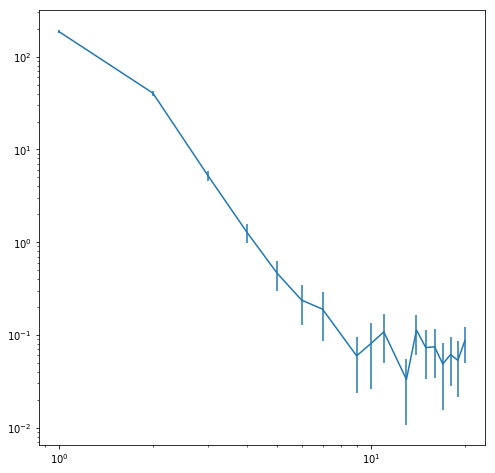

In [14]:
plt.rcParams['figure.figsize']=(8,8)
x = dataProf.xhi
y = dataProf.y
yerr = dataProf.yerr

plt.errorbar(x,y,yerr)
plt.yscale('log')
plt.xscale('log')

In [ ]:
#4063
N = 4063
C1 = 4110.6743
C2 = 4105.8374
R = 20
X = 11.4 #use this to change the width of the gaussian for better fit 
H = 5000 # plot height y axis 
dataProf= fitMe2Gaussian(N,C1,C2,R,X,H)

In [130]:
'''Testing the PileUp model'''

load_pha("47.pi") 
load_bkg("47_bkg.pi")
load_arf("47.arf")
load_rmf("47.rmf")
subtract()

plot_data()

notice(0,7) 
add_window()
plot_data()

#set_model(xswabs.abs1*xspowerlaw.power1)
set_model(gauss1d.src)

show_model()

guess(get_model())
#guess(abs1)
#guess(power1)
guess(src)
show_model()

thaw(abs1.nh)
show_model()

set_pileup_model(jdpileup.jdp)
print(get_pileup_model())
jdp.f.min=0.85
jdp.ftime=3.2
jdp.fracexp=1.0   
jdp.nterms=30 
print(get_pileup_model())

#set_method("neldermead")
#set_stat("chi2datavar")
#fit()

set_method("moncar")
set_stat("chi2modvar")
fit()

#set_method("neldermead")
#set_conf_opt("fast", False)
#conf()


add_window()
plot_fit_delchi()

print(get_pileup_model())

save("47_pileup_fit.save" , clobber=True, ascii=True)

print(get_pileup_model())

read ARF file 47.arf
read RMF file 47.rmf
read ARF (background) file 47_bkg.arf
read RMF (background) file 47_bkg.rmf
read background file 47_bkg.pi
read ARF (background) file 47_bkg.arf
read RMF (background) file 47_bkg.rmf
jdpileup.jdp
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   jdp.alpha    thawed     0.955019            0            1           
   jdp.g0       frozen            1  1.17549e-38            1           
   jdp.f        thawed         0.85         0.85            1           
   jdp.n        frozen            1  1.17549e-38          100           
   jdp.ftime    frozen          3.2  1.17549e-38            5        sec
   jdp.fracexp  frozen            1            0            1           
   jdp.nterms   frozen           30            1          100           

   1: 0.239094  0.286363
   2: 0.267218  0.305651
   3: 0.1991  0.217492
   4: 0.11126  0.11607
   5: 0.

/Users/tzegoh/Desktop/ciao/ciao-4.11/lib/python3.5/site-packages/sherpa-ciao4.11-py3.5-macosx-10.13-x86_64.egg/sherpa/plot/__init__.py:1130: RuntimeWarning: divide by zero encountered in true_divide
  return (ylist[0] - ylist[1]) / staterr


jdpileup.jdp
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   jdp.alpha    thawed     0.955262            0            1           
   jdp.g0       frozen            1  1.17549e-38            1           
   jdp.f        thawed         0.85         0.85            1           
   jdp.n        frozen            1  1.17549e-38          100           
   jdp.ftime    frozen          3.2  1.17549e-38            5        sec
   jdp.fracexp  frozen            1            0            1           
   jdp.nterms   frozen           30            1          100           

   1: 0.24026  0.287869
   2: 0.267462  0.306123
   3: 0.198495  0.217024
   4: 0.110484  0.115393
   5: 0.0491971  0.0490842
   6: 0.0182557  0.0173989
   7: 0.00580643  0.00528635
   8: 0.00161595  0.00140539
   9: 0.000399756  0.000332114
   10: 8.90031e-05  7.0635e-05
   11: 1.80145e-05  1.36571e-05
   *** pileup fraction: 

TypeError: save() got an unexpected keyword argument 'ascii'

In [132]:
load_ascii("47_pileup_fit.save")

OSError: No kernel found for dataset 47_pileup_fit.save

IOErr: no arrays found to be loaded

In [116]:
load_pha("47.pi") 
load_bkg("47_bkg.pi")
load_arf("47.arf")
load_rmf("47.rmf")
subtract()
arf = get_arf().specresp
elo = get_arf().energ_lo
ehi = get_arf().energ_hi
print(arf)
print(elo)
print(ehi)

read ARF file 47.arf
read RMF file 47.rmf
read ARF (background) file 47_bkg.arf
read RMF (background) file 47_bkg.rmf
read background file 47_bkg.pi
read ARF (background) file 47_bkg.arf
read RMF (background) file 47_bkg.rmf
[3.72341423e+01 8.20057678e+01 9.58959045e+01 1.12486115e+02
 1.27931580e+02 1.40352570e+02 1.49566422e+02 1.60684814e+02
 1.74344147e+02 1.87675217e+02 1.87534470e+02 1.95400055e+02
 2.20073013e+02 2.36961166e+02 2.48669037e+02 2.63616089e+02
 2.76159180e+02 2.88652008e+02 2.99755402e+02 3.10327606e+02
 3.23466492e+02 3.36643494e+02 3.49786896e+02 3.07316132e+02
 2.64634460e+02 2.92004120e+02 3.03689880e+02 3.26158569e+02
 3.37982147e+02 3.48256134e+02 3.59274780e+02 3.68350769e+02
 3.78530640e+02 3.89512360e+02 3.98270874e+02 4.07605835e+02
 4.16747742e+02 4.26555206e+02 4.33713165e+02 4.34395325e+02
 4.46072998e+02 4.55145264e+02 4.63559357e+02 4.70777374e+02
 4.78430542e+02 4.86033478e+02 4.93322205e+02 5.00143799e+02
 5.07081573e+02 5.14007996e+02 5.20647461e+

In [122]:
load_data("47_pileup_fit.save")

OSError: No kernel found for dataset 47_pileup_fit.save

In [124]:
read_file( "47_pileup_fit.save")

OSError: No kernel found for dataset 47_pileup_fit.save

In [129]:
load_image("47_pileup_fit.save")

OSError: No kernel found for dataset 47_pileup_fit.save